In [5]:
import CM.covariance as CV
import numpy as np
from tqdm import tqdm

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

config = {
            "font.family": 'serif',
            "font.size": 12,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['Times New Roman'],
            'axes.unicode_minus': False # 处理负号，即-号
         }
rcParams.update(config)

100%|██████████| 42/42 [01:08<00:00,  1.63s/it]


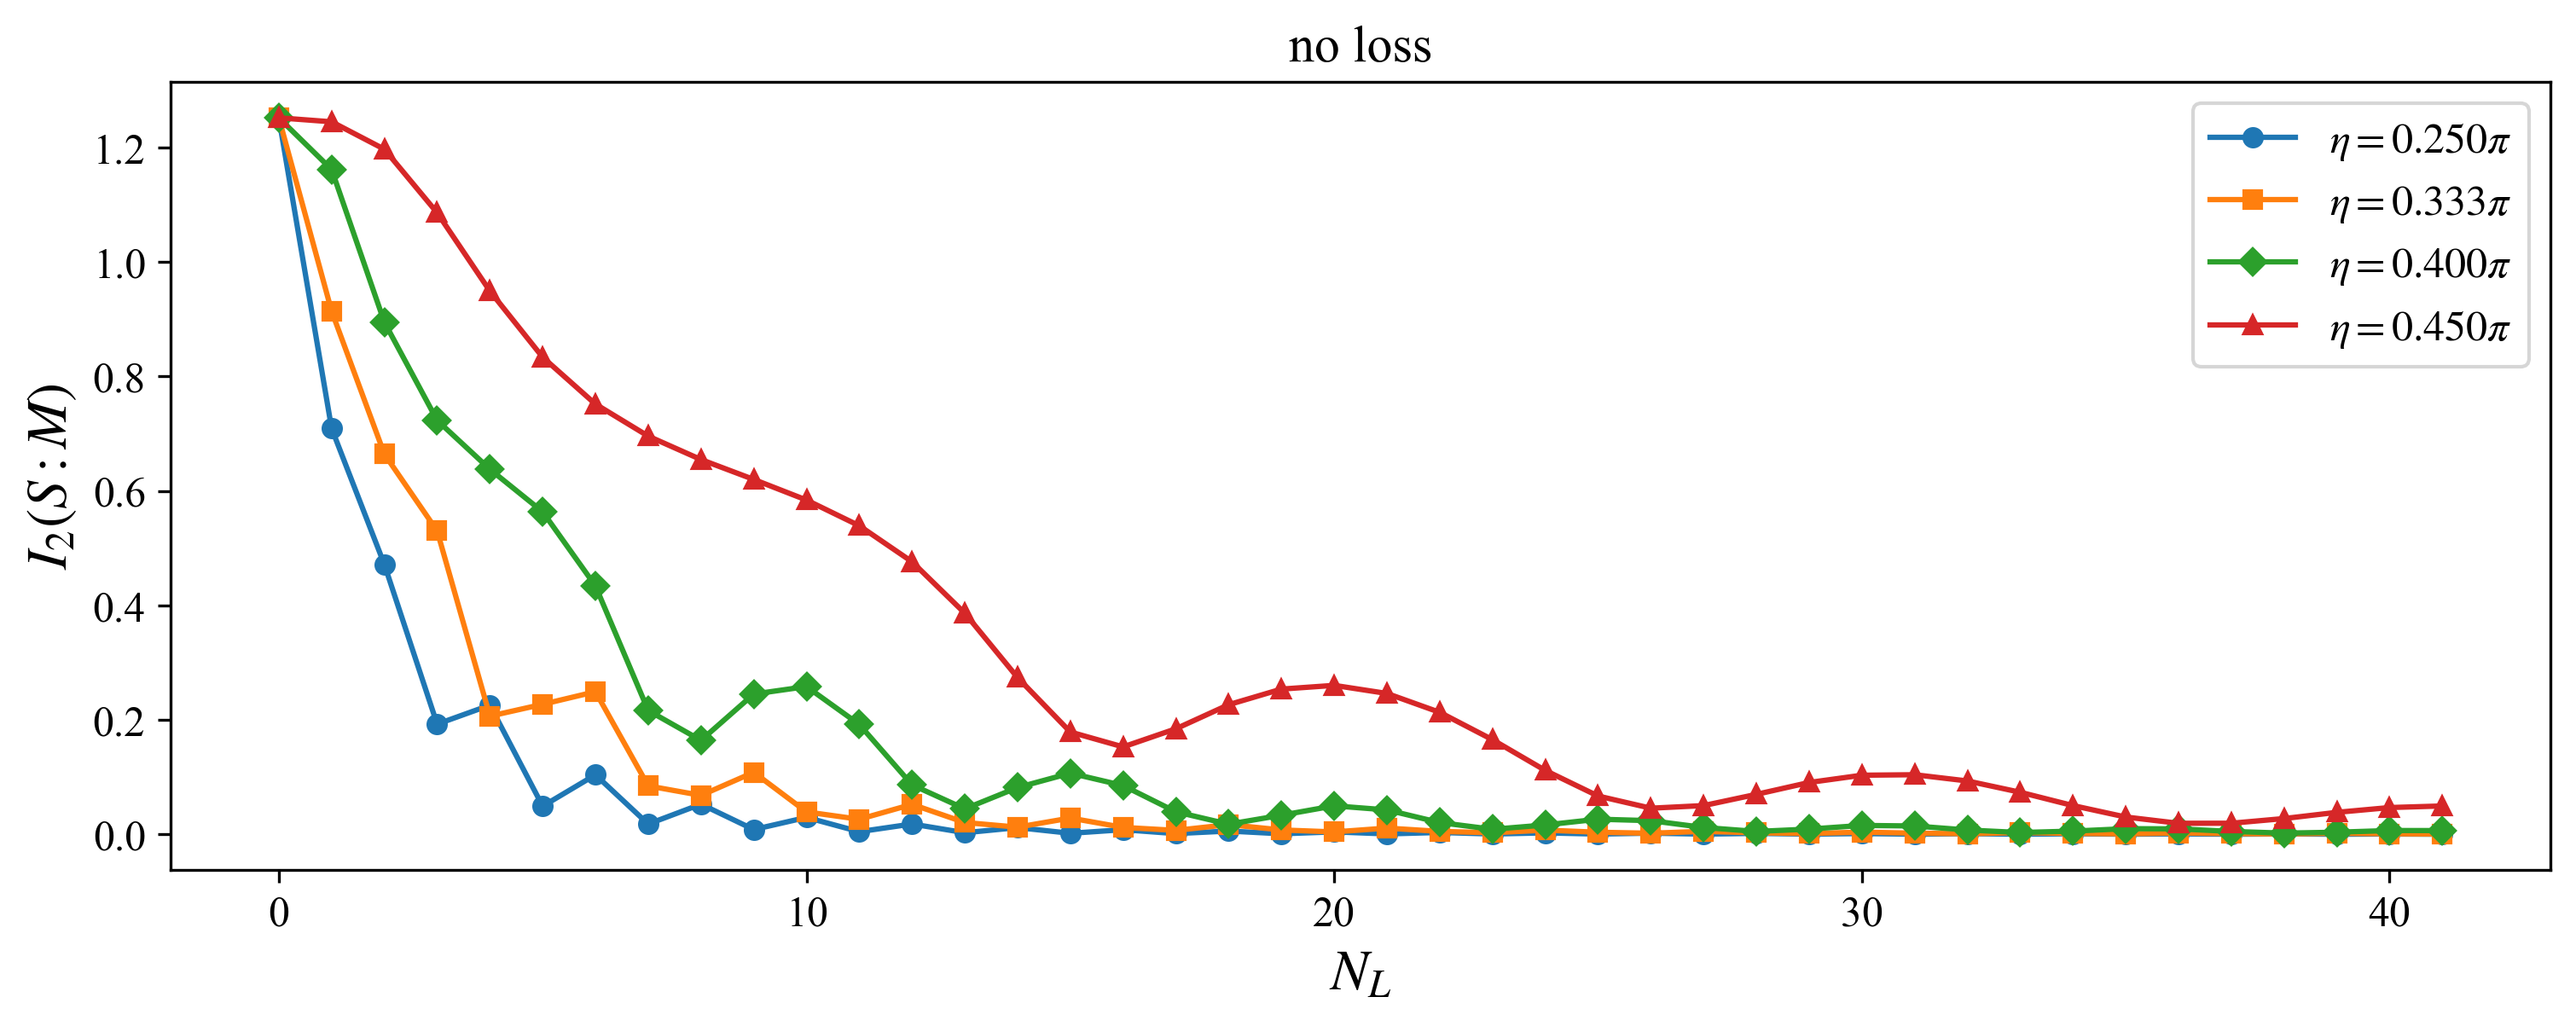

In [7]:
# scale
Ns: int = 1
Nm: int = 2
NL = np.arange(41, -1, -1)

# BS
eta = np.array([1/4, 1/3, 2/5, 9/20])*np.pi

# S2
s_r: float = 0.6
s_phi: float = 0

# PS 
delta_k: float = 0

# S
r_k: float = 1.4
phi_k: float = 0

# loss
if_add_loss: bool = False
if_loss_input : bool = False
loss_amplitude_bs : float = None
loss_input : np.array = None

# additonal features
if_odd_even: bool = False
if_part_computing: bool = False
part_computing_layers: int = 0
if_uncertain_params: bool = False
uncertain_percentage: float = 0.05


I3 = np.zeros((len(eta), len(NL)))
I2_SM12 = np.zeros((len(eta), len(NL)))
I2_SM1 = np.zeros((len(eta), len(NL)))
I2_SM2 = np.zeros((len(eta), len(NL)))


for j in tqdm(range(len(NL))):
    for i in range(len(eta)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL[j],  # scale
            eta=eta[i],              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=if_add_loss,    # loss
            if_odd_even=if_odd_even,     # additonal features
            if_part_computing=if_part_computing  # additonal features
    
        )
        a.compute()

        I3[i, j] = a.I3()
        I2_SM12[i, j] = a.I2_SM12()
        I2_SM1[i, j] = a.I2_SM1()
        I2_SM2[i, j] = a.I2_SM2()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4), dpi=300)
dot = ['o', 's', 'D', '^']
for i in range(len(eta)):
    plt.plot(NL, I2_SM12[i, :], 
             label=r'$\eta={:.3f}\pi$'.format(eta[i]/np.pi),
             marker=dot[i], markersize=5)


plt.xlabel(r'$N_L$', fontsize=16)
plt.ylabel(r'$I_2(S:M)$', fontsize=16)
plt.legend()


plt.title(r'no loss' )  

plt.savefig(r'pic1\1BMI.png',
             dpi=300, bbox_inches='tight')



100%|██████████| 42/42 [01:04<00:00,  1.54s/it]


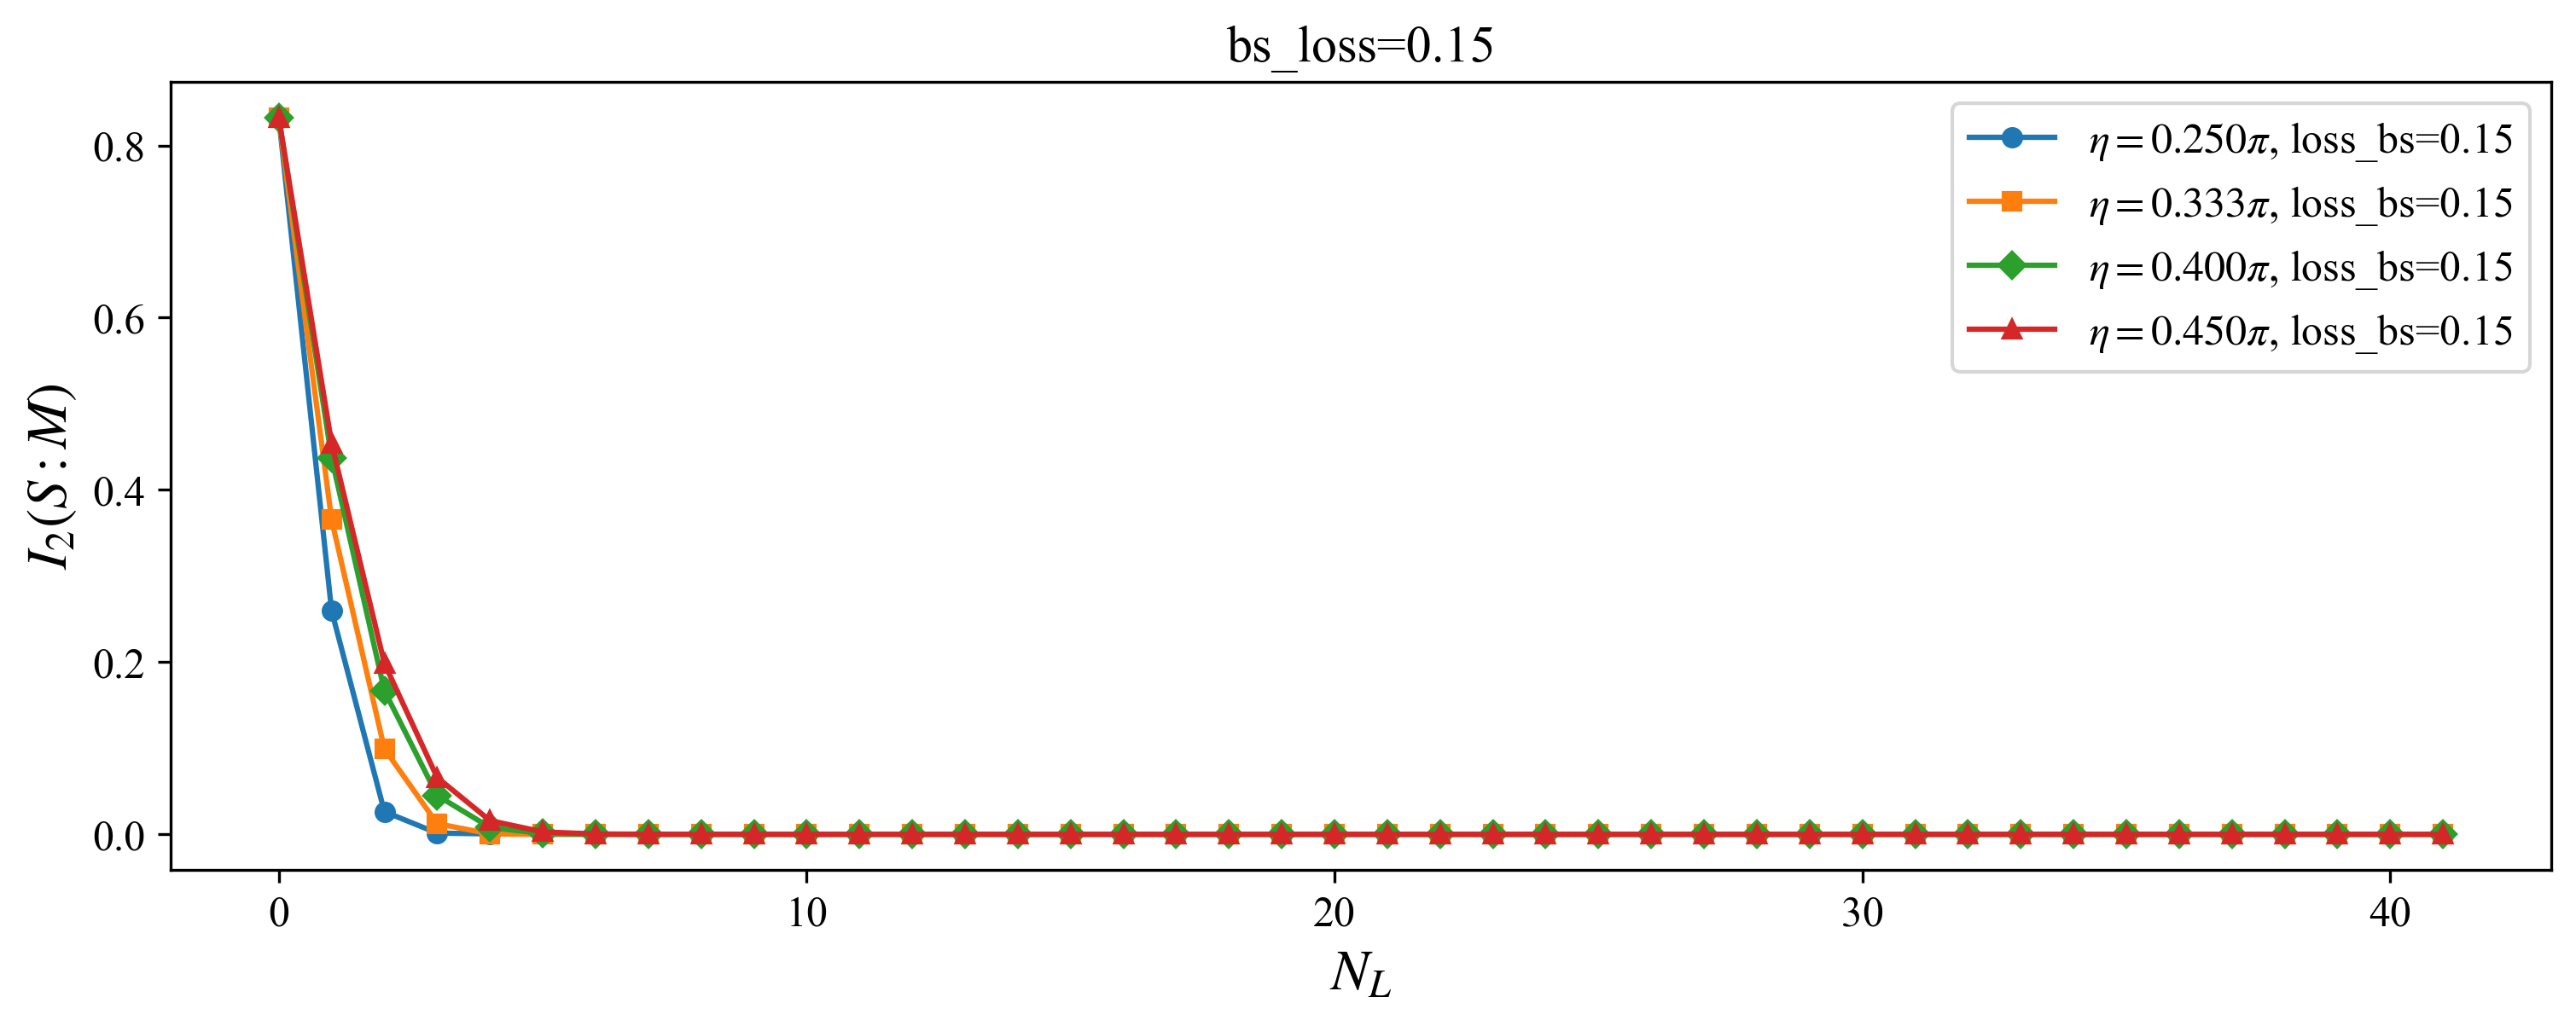

In [8]:
# scale
Ns: int = 1
Nm: int = 2
NL = np.arange(41, -1, -1)

# BS
eta = np.array([1/4, 1/3, 2/5, 9/20])*np.pi

# S2
s_r: float = 0.6
s_phi: float = 0

# PS 
delta_k: float = 0

# S
r_k: float = 1.4
phi_k: float = 0

# loss
if_add_loss: bool = False
if_loss_input : bool = False
loss_amplitude_bs : float = None
loss_input : np.array = None

# additonal features
if_odd_even: bool = False
if_part_computing: bool = False
part_computing_layers: int = 0
if_uncertain_params: bool = False
uncertain_percentage: float = 0.05


I3 = np.zeros((len(eta), len(NL)))
I2_SM12 = np.zeros((len(eta), len(NL)))
I2_SM1 = np.zeros((len(eta), len(NL)))
I2_SM2 = np.zeros((len(eta), len(NL)))


############################
if_add_loss = True
loss_amplitude_bs = 0.15
############################

for j in tqdm(range(len(NL))):
    for i in range(len(eta)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL[j],  # scale
            eta=eta[i],              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=if_add_loss, loss_amplitude_bs=loss_amplitude_bs,   # loss
            if_odd_even=if_odd_even,     # additonal features
            if_part_computing=if_part_computing,  # additonal features

        )
        a.compute()

        I3[i, j] = a.I3()
        I2_SM12[i, j] = a.I2_SM12()
        I2_SM1[i, j] = a.I2_SM1()
        I2_SM2[i, j] = a.I2_SM2()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4), dpi=300)
dot = ['o', 's', 'D', '^']
for i in range(len(eta)):
    plt.plot(NL, I2_SM12[i, :], 
             label=r'$\eta={:.3f}\pi$, loss_bs={:.2f}'.format(eta[i]/np.pi, loss_amplitude_bs),
             marker=dot[i], markersize=5)


plt.xlabel(r'$N_L$', fontsize=16)
plt.ylabel(r'$I_2(S:M)$', fontsize=16)
plt.legend()


plt.title(r'bs_loss={:.2f}'.format(loss_amplitude_bs) )  

plt.savefig(r'pic1\1BMI-loss.png',
             dpi=300, bbox_inches='tight')



100%|██████████| 42/42 [01:47<00:00,  2.56s/it]


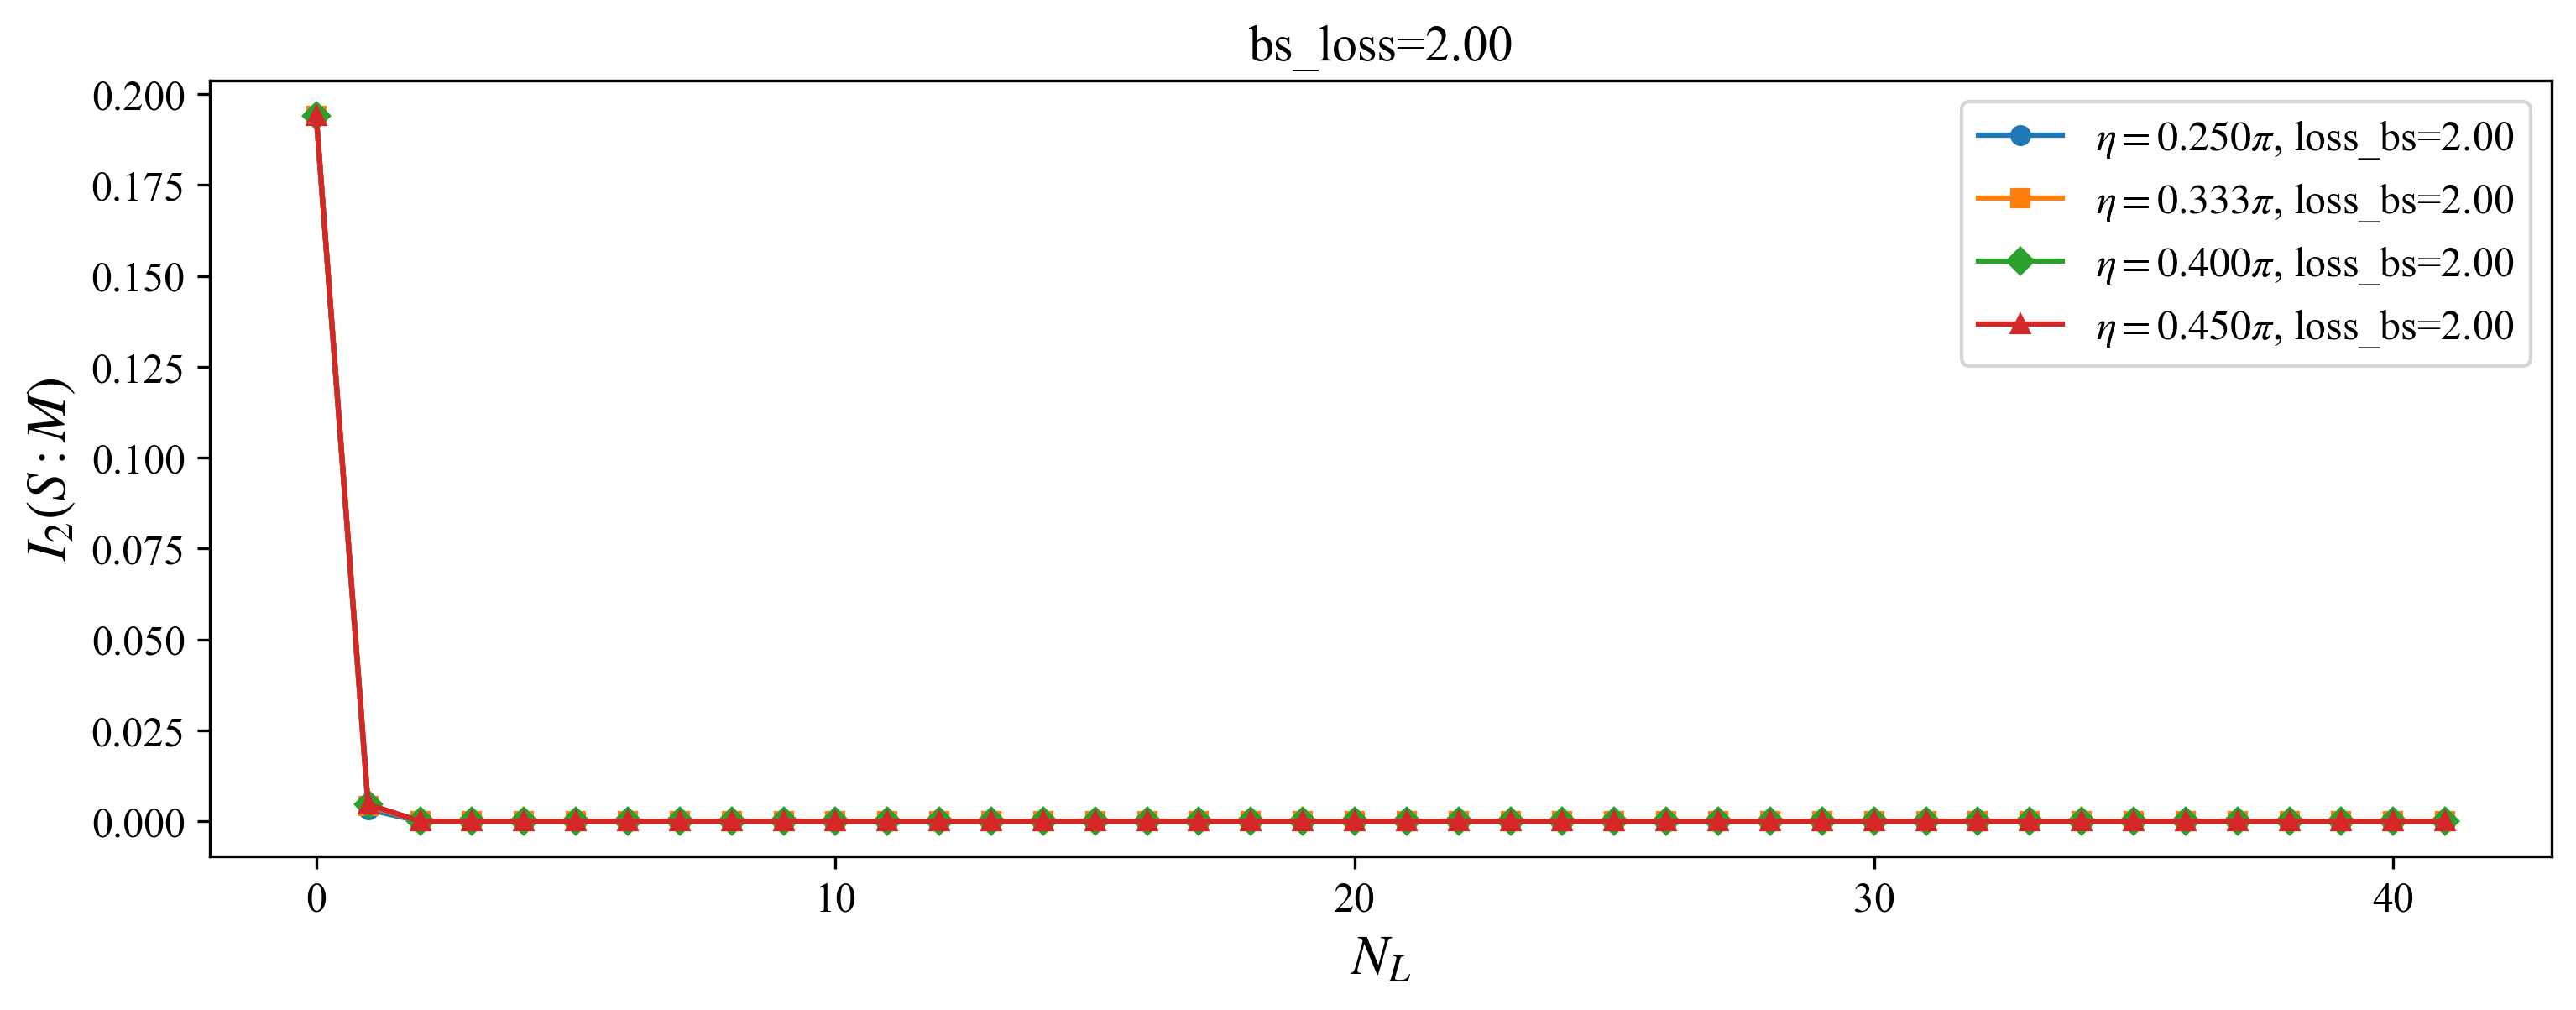

In [23]:
# scale
Ns: int = 1
Nm: int = 2
NL = np.arange(41, -1, -1)

# BS
eta = np.array([1/4, 1/3, 2/5, 9/20])*np.pi

# S2
s_r: float = 0.6
s_phi: float = 0

# PS 
delta_k: float = 0

# S
r_k: float = 1.4
phi_k: float = 0

# loss
if_add_loss: bool = False
if_loss_input : bool = False
loss_amplitude_bs : float = None
loss_input : np.array = None

# additonal features
if_odd_even: bool = False
if_part_computing: bool = False
part_computing_layers: int = 0
if_uncertain_params: bool = False
uncertain_percentage: float = 0.05


I3 = np.zeros((len(eta), len(NL)))
I2_SM12 = np.zeros((len(eta), len(NL)))
I2_SM1 = np.zeros((len(eta), len(NL)))
I2_SM2 = np.zeros((len(eta), len(NL)))


############################
if_add_loss = True
loss_amplitude_bs = 2
############################

for j in tqdm(range(len(NL))):
    for i in range(len(eta)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL[j],  # scale
            eta=eta[i],              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=if_add_loss, loss_amplitude_bs=loss_amplitude_bs,   # loss
            if_odd_even=if_odd_even,     # additonal features
            if_part_computing=if_part_computing,  # additonal features

        )
        a.compute()

        I3[i, j] = a.I3()
        I2_SM12[i, j] = a.I2_SM12()
        I2_SM1[i, j] = a.I2_SM1()
        I2_SM2[i, j] = a.I2_SM2()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4), dpi=300)
dot = ['o', 's', 'D', '^']
for i in range(len(eta)):
    plt.plot(NL, I2_SM12[i, :], 
             label=r'$\eta={:.3f}\pi$, loss_bs={:.2f}'.format(eta[i]/np.pi, loss_amplitude_bs),
             marker=dot[i], markersize=5)


plt.xlabel(r'$N_L$', fontsize=16)
plt.ylabel(r'$I_2(S:M)$', fontsize=16)
plt.legend()


plt.title(r'bs_loss={:.2f}'.format(loss_amplitude_bs) )  

plt.savefig(r'pic1\1BMI-loss2.png',
             dpi=300, bbox_inches='tight')



100%|██████████| 42/42 [01:06<00:00,  1.59s/it]


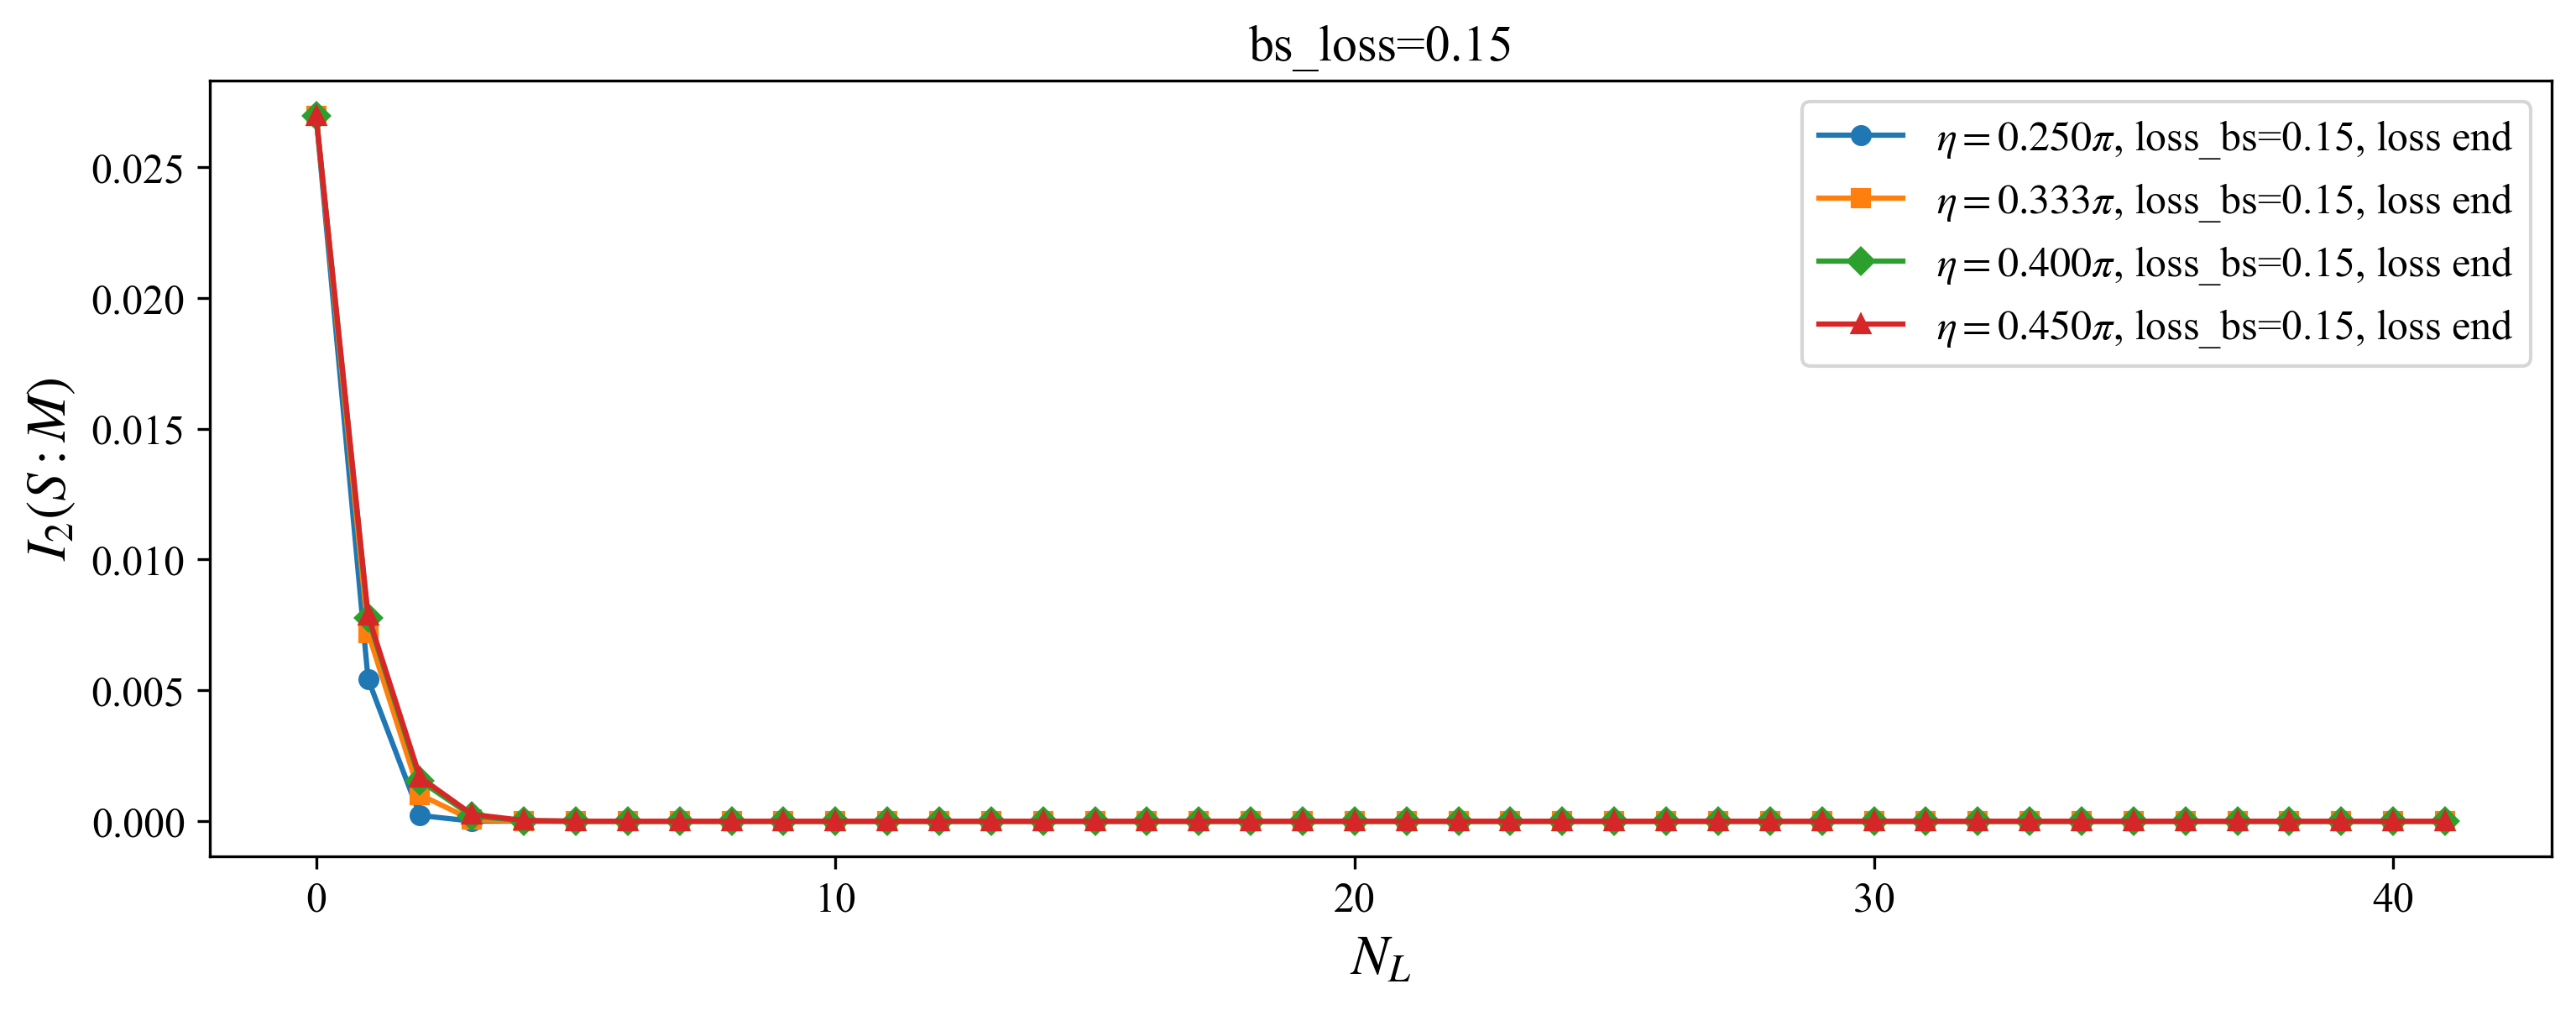

In [16]:
# scale
Ns: int = 1
Nm: int = 2
NL = np.arange(41, -1, -1)

# BS
eta = np.array([1/4, 1/3, 2/5, 9/20])*np.pi

# S2
s_r: float = 0.6
s_phi: float = 0

# PS 
delta_k: float = 0

# S
r_k: float = 1.4
phi_k: float = 0

# loss
if_add_loss: bool = False
if_loss_input : bool = False
loss_amplitude_bs : float = None
loss_input : np.array = None

# additonal features
if_odd_even: bool = False
if_part_computing: bool = False
part_computing_layers: int = 0
if_uncertain_params: bool = False
uncertain_percentage: float = 0.05


I3 = np.zeros((len(eta), len(NL)))
I2_SM12 = np.zeros((len(eta), len(NL)))
I2_SM1 = np.zeros((len(eta), len(NL)))
I2_SM2 = np.zeros((len(eta), len(NL)))

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4), dpi=300)

############################
if_add_loss = True
loss_amplitude_bs = 0.15
if_loss_end = True
############################

I3 = np.zeros((len(eta), len(NL)))
I2_SM12 = np.zeros((len(eta), len(NL)))
I2_SM1 = np.zeros((len(eta), len(NL)))
I2_SM2 = np.zeros((len(eta), len(NL)))


for j in tqdm(range(len(NL))):
    for i in range(len(eta)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL[j],  # scale
            eta=eta[i],              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=if_add_loss, loss_amplitude_bs=loss_amplitude_bs,   # loss
            if_odd_even=if_odd_even,     # additonal features
            if_part_computing=if_part_computing,  # additonal features
            if_loss_end=if_loss_end,
        )
        a.compute()

        I3[i, j] = a.I3()
        I2_SM12[i, j] = a.I2_SM12()
        I2_SM1[i, j] = a.I2_SM1()
        I2_SM2[i, j] = a.I2_SM2()

dot = ['o', 's', 'D', '^']
for i in range(len(eta)):
    plt.plot(NL, I2_SM12[i, :], 
             label=r'$\eta={:.3f}\pi$, loss_bs={:.2f}, loss end'.format(eta[i]/np.pi, loss_amplitude_bs),
             marker=dot[i], markersize=5)
plt.xlabel(r'$N_L$', fontsize=16)
plt.ylabel(r'$I_2(S:M)$', fontsize=16)
plt.legend()


plt.title(r'bs_loss={:.2f}'.format(loss_amplitude_bs) )  

plt.savefig(r'pic1\1BMI-loss-end.png',
             dpi=300, bbox_inches='tight')



100%|██████████| 42/42 [01:47<00:00,  2.55s/it]


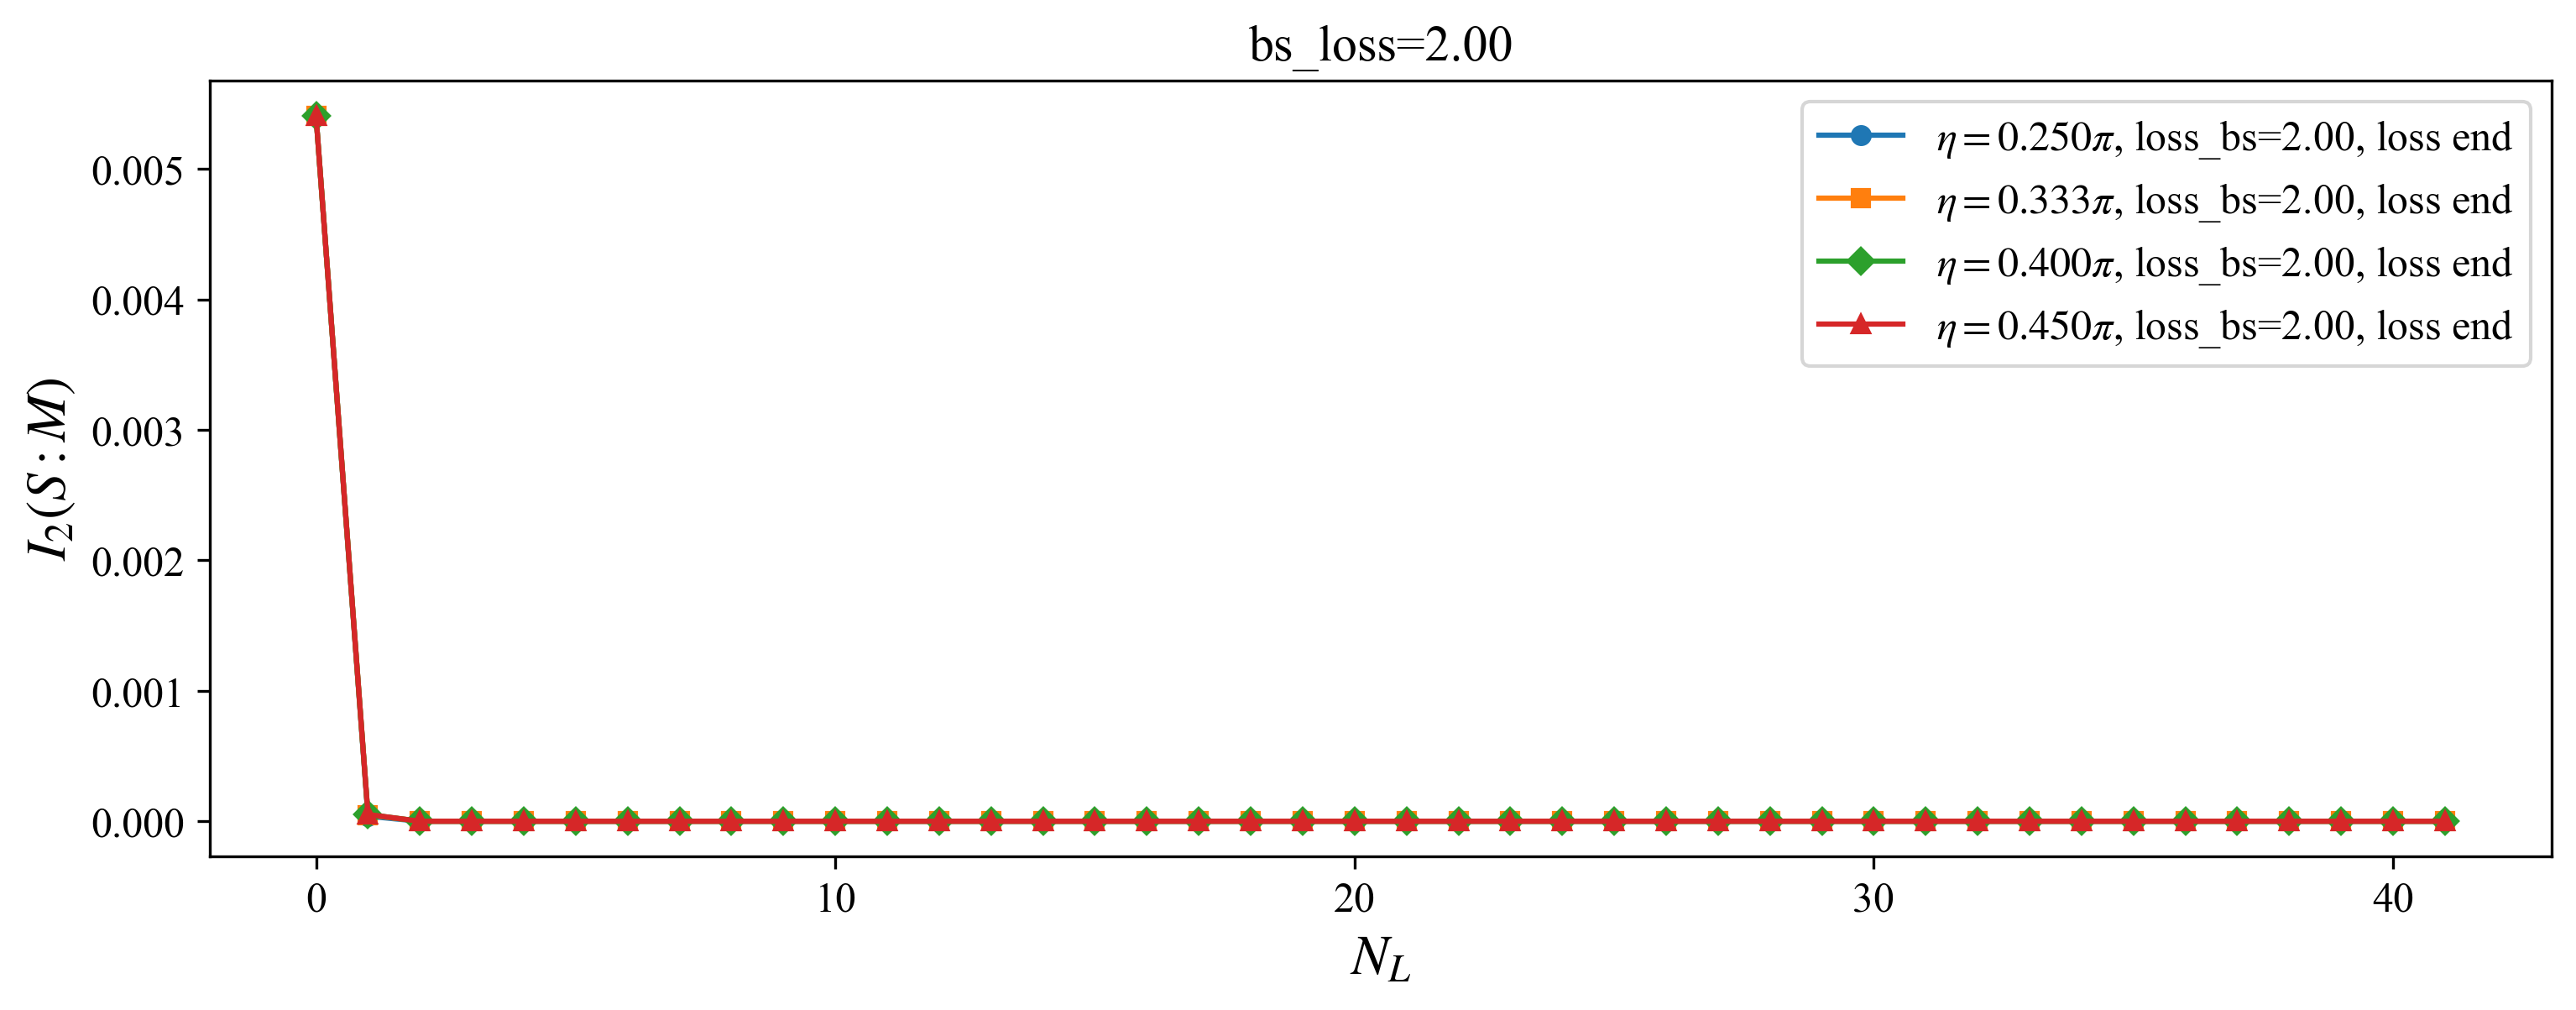

In [17]:
# scale
Ns: int = 1
Nm: int = 2
NL = np.arange(41, -1, -1)

# BS
eta = np.array([1/4, 1/3, 2/5, 9/20])*np.pi

# S2
s_r: float = 0.6
s_phi: float = 0

# PS 
delta_k: float = 0

# S
r_k: float = 1.4
phi_k: float = 0

# loss
if_add_loss: bool = False
if_loss_input : bool = False
loss_amplitude_bs : float = None
loss_input : np.array = None

# additonal features
if_odd_even: bool = False
if_part_computing: bool = False
part_computing_layers: int = 0
if_uncertain_params: bool = False
uncertain_percentage: float = 0.05


I3 = np.zeros((len(eta), len(NL)))
I2_SM12 = np.zeros((len(eta), len(NL)))
I2_SM1 = np.zeros((len(eta), len(NL)))
I2_SM2 = np.zeros((len(eta), len(NL)))

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4), dpi=300)

############################
if_add_loss = True
loss_amplitude_bs = 2
if_loss_end = True
############################

I3 = np.zeros((len(eta), len(NL)))
I2_SM12 = np.zeros((len(eta), len(NL)))
I2_SM1 = np.zeros((len(eta), len(NL)))
I2_SM2 = np.zeros((len(eta), len(NL)))


for j in tqdm(range(len(NL))):
    for i in range(len(eta)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL[j],  # scale
            eta=eta[i],              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=if_add_loss, loss_amplitude_bs=loss_amplitude_bs,   # loss
            if_odd_even=if_odd_even,     # additonal features
            if_part_computing=if_part_computing,  # additonal features
            if_loss_end=if_loss_end,
        )
        a.compute()

        I3[i, j] = a.I3()
        I2_SM12[i, j] = a.I2_SM12()
        I2_SM1[i, j] = a.I2_SM1()
        I2_SM2[i, j] = a.I2_SM2()

dot = ['o', 's', 'D', '^']
for i in range(len(eta)):
    plt.plot(NL, I2_SM12[i, :], 
             label=r'$\eta={:.3f}\pi$, loss_bs={:.2f}, loss end'.format(eta[i]/np.pi, loss_amplitude_bs),
             marker=dot[i], markersize=5)
plt.xlabel(r'$N_L$', fontsize=16)
plt.ylabel(r'$I_2(S:M)$', fontsize=16)
plt.legend()


plt.title(r'bs_loss={:.2f}'.format(loss_amplitude_bs) )  

plt.savefig(r'pic1\1BMI-loss-end2.png',
             dpi=300, bbox_inches='tight')



100%|██████████| 42/42 [02:47<00:00,  3.99s/it]


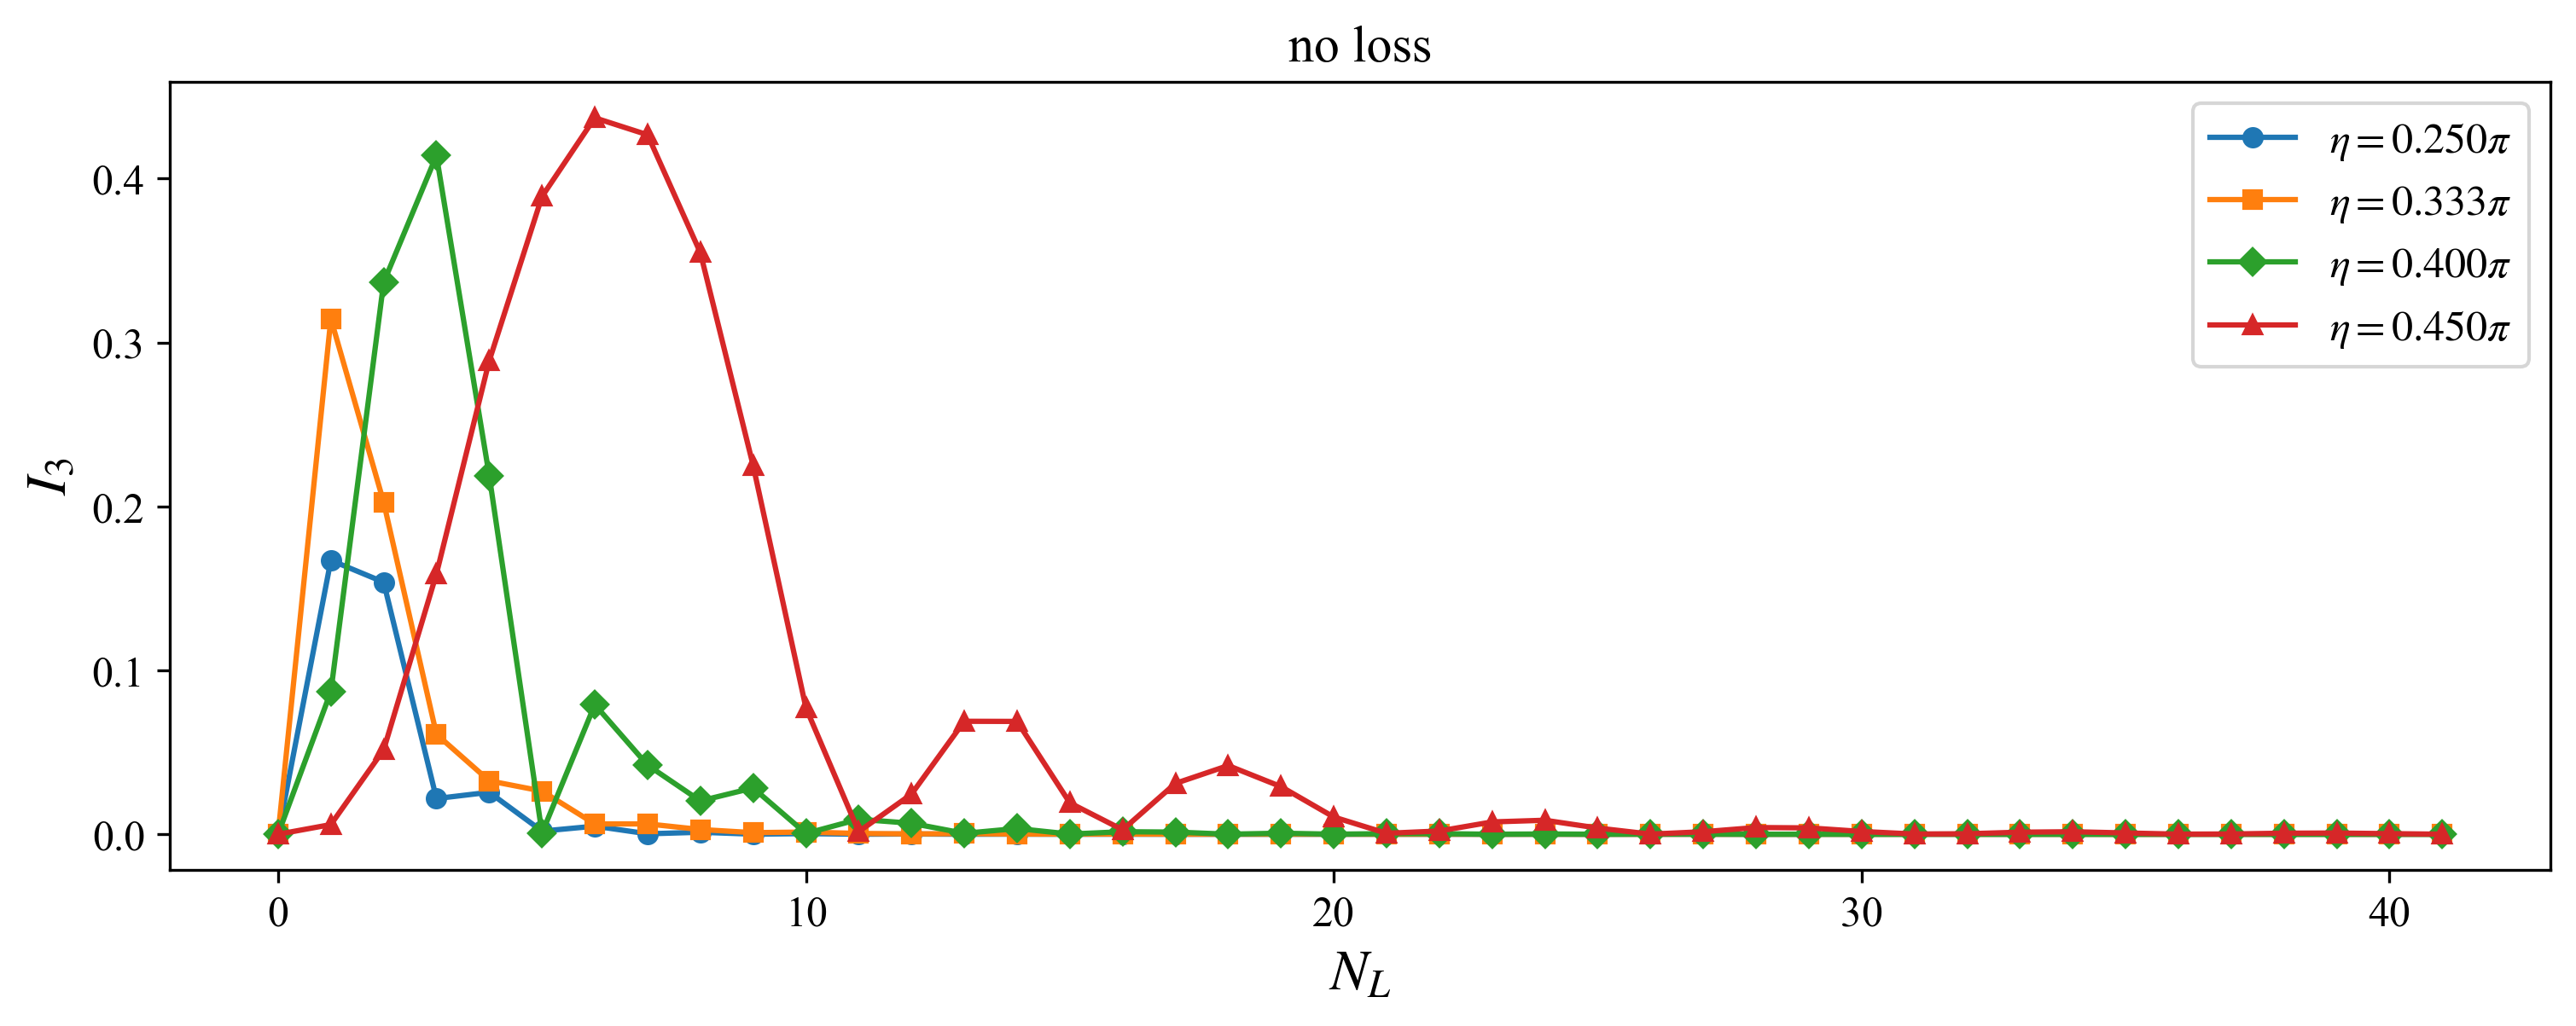

In [18]:
# scale
Ns: int = 1
Nm: int = 2
NL = np.arange(41, -1, -1)

# BS
eta = np.array([1/4, 1/3, 2/5, 9/20])*np.pi

# S2
s_r: float = 0.6
s_phi: float = 0

# PS 
delta_k: float = 0

# S
r_k: float = 1.4
phi_k: float = 0

# loss
if_add_loss: bool = False
if_loss_input : bool = False
loss_amplitude_bs : float = None
loss_input : np.array = None

# additonal features
if_odd_even: bool = False
if_part_computing: bool = False
part_computing_layers: int = 0
if_uncertain_params: bool = False
uncertain_percentage: float = 0.05


I3 = np.zeros((len(eta), len(NL)))
I2_SM12 = np.zeros((len(eta), len(NL)))
I2_SM1 = np.zeros((len(eta), len(NL)))
I2_SM2 = np.zeros((len(eta), len(NL)))


for j in tqdm(range(len(NL))):
    for i in range(len(eta)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL[j],  # scale
            eta=eta[i],              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=if_add_loss,    # loss
            if_odd_even=if_odd_even,     # additonal features
            if_part_computing=if_part_computing  # additonal features
    
        )
        a.compute()

        I3[i, j] = a.I3()
        I2_SM12[i, j] = a.I2_SM12()
        I2_SM1[i, j] = a.I2_SM1()
        I2_SM2[i, j] = a.I2_SM2()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4), dpi=300)
dot = ['o', 's', 'D', '^']
for i in range(len(eta)):
    plt.plot(NL, I3[i, :], 
             label=r'$\eta={:.3f}\pi$'.format(eta[i]/np.pi), 
             marker=dot[i], markersize=5)

plt.xlabel(r'$N_L$', fontsize=16)
plt.ylabel(r'$I_3$', fontsize=16)
plt.legend()
plt.title(r'no loss' )  

plt.savefig(r'pic1\1TMI.png',
             dpi=300, bbox_inches='tight')



100%|██████████| 42/42 [01:08<00:00,  1.62s/it]


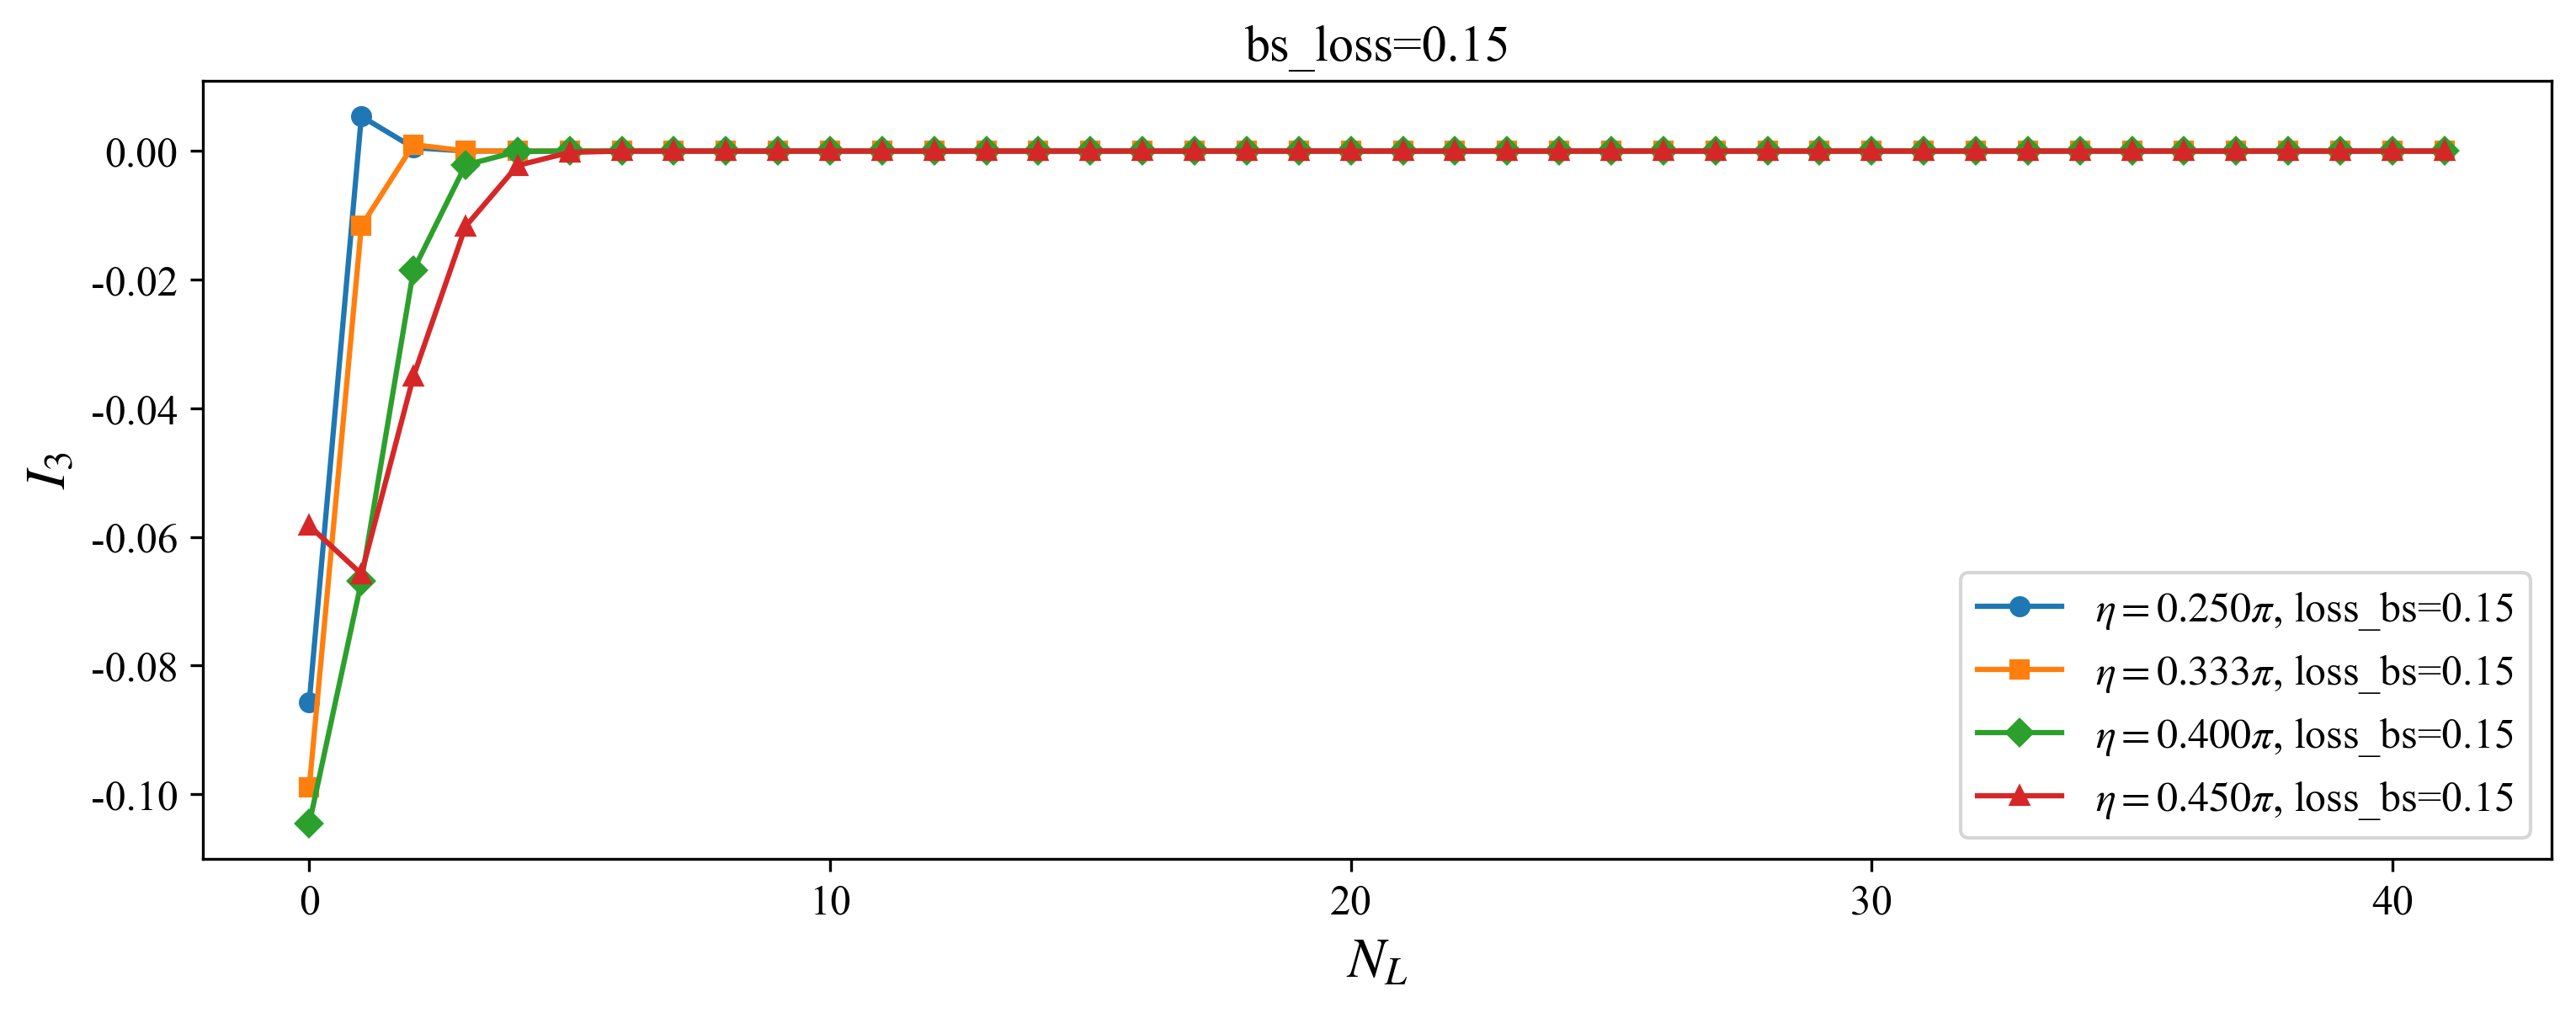

In [11]:
# scale
Ns: int = 1
Nm: int = 2
NL = np.arange(41, -1, -1)

# BS
eta = np.array([1/4, 1/3, 2/5, 9/20])*np.pi

# S2
s_r: float = 0.6
s_phi: float = 0

# PS 
delta_k: float = 0

# S
r_k: float = 1.4
phi_k: float = 0

# loss
if_add_loss: bool = False
if_loss_input : bool = False
loss_amplitude_bs : float = None
loss_input : np.array = None

# additonal features
if_odd_even: bool = False
if_part_computing: bool = False
part_computing_layers: int = 0
if_uncertain_params: bool = False
uncertain_percentage: float = 0.05


I3 = np.zeros((len(eta), len(NL)))
I2_SM12 = np.zeros((len(eta), len(NL)))
I2_SM1 = np.zeros((len(eta), len(NL)))
I2_SM2 = np.zeros((len(eta), len(NL)))


############################
if_add_loss = True
loss_amplitude_bs = 0.15
############################


for j in tqdm(range(len(NL))):
    for i in range(len(eta)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL[j],  # scale
            eta=eta[i],              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=if_add_loss, loss_amplitude_bs=loss_amplitude_bs,   # loss
            if_odd_even=if_odd_even,     # additonal features
            if_part_computing=if_part_computing  # additonal features
    
        )
        a.compute()

        I3[i, j] = a.I3()
        I2_SM12[i, j] = a.I2_SM12()
        I2_SM1[i, j] = a.I2_SM1()
        I2_SM2[i, j] = a.I2_SM2()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4), dpi=300)
dot = ['o', 's', 'D', '^']
for i in range(len(eta)):
    plt.plot(NL, I3[i, :], 
             label=r'$\eta={:.3f}\pi$, loss_bs={:.2f}'.format(eta[i]/np.pi, loss_amplitude_bs), 
             marker=dot[i], markersize=5)


plt.xlabel(r'$N_L$', fontsize=16)
plt.ylabel(r'$I_3$', fontsize=16)
plt.legend()


plt.title(r'bs_loss={:.2f}'.format(loss_amplitude_bs) )  

plt.savefig(r'pic1\1TMI-loss.png',
             dpi=300, bbox_inches='tight')



100%|██████████| 42/42 [05:53<00:00,  8.42s/it]


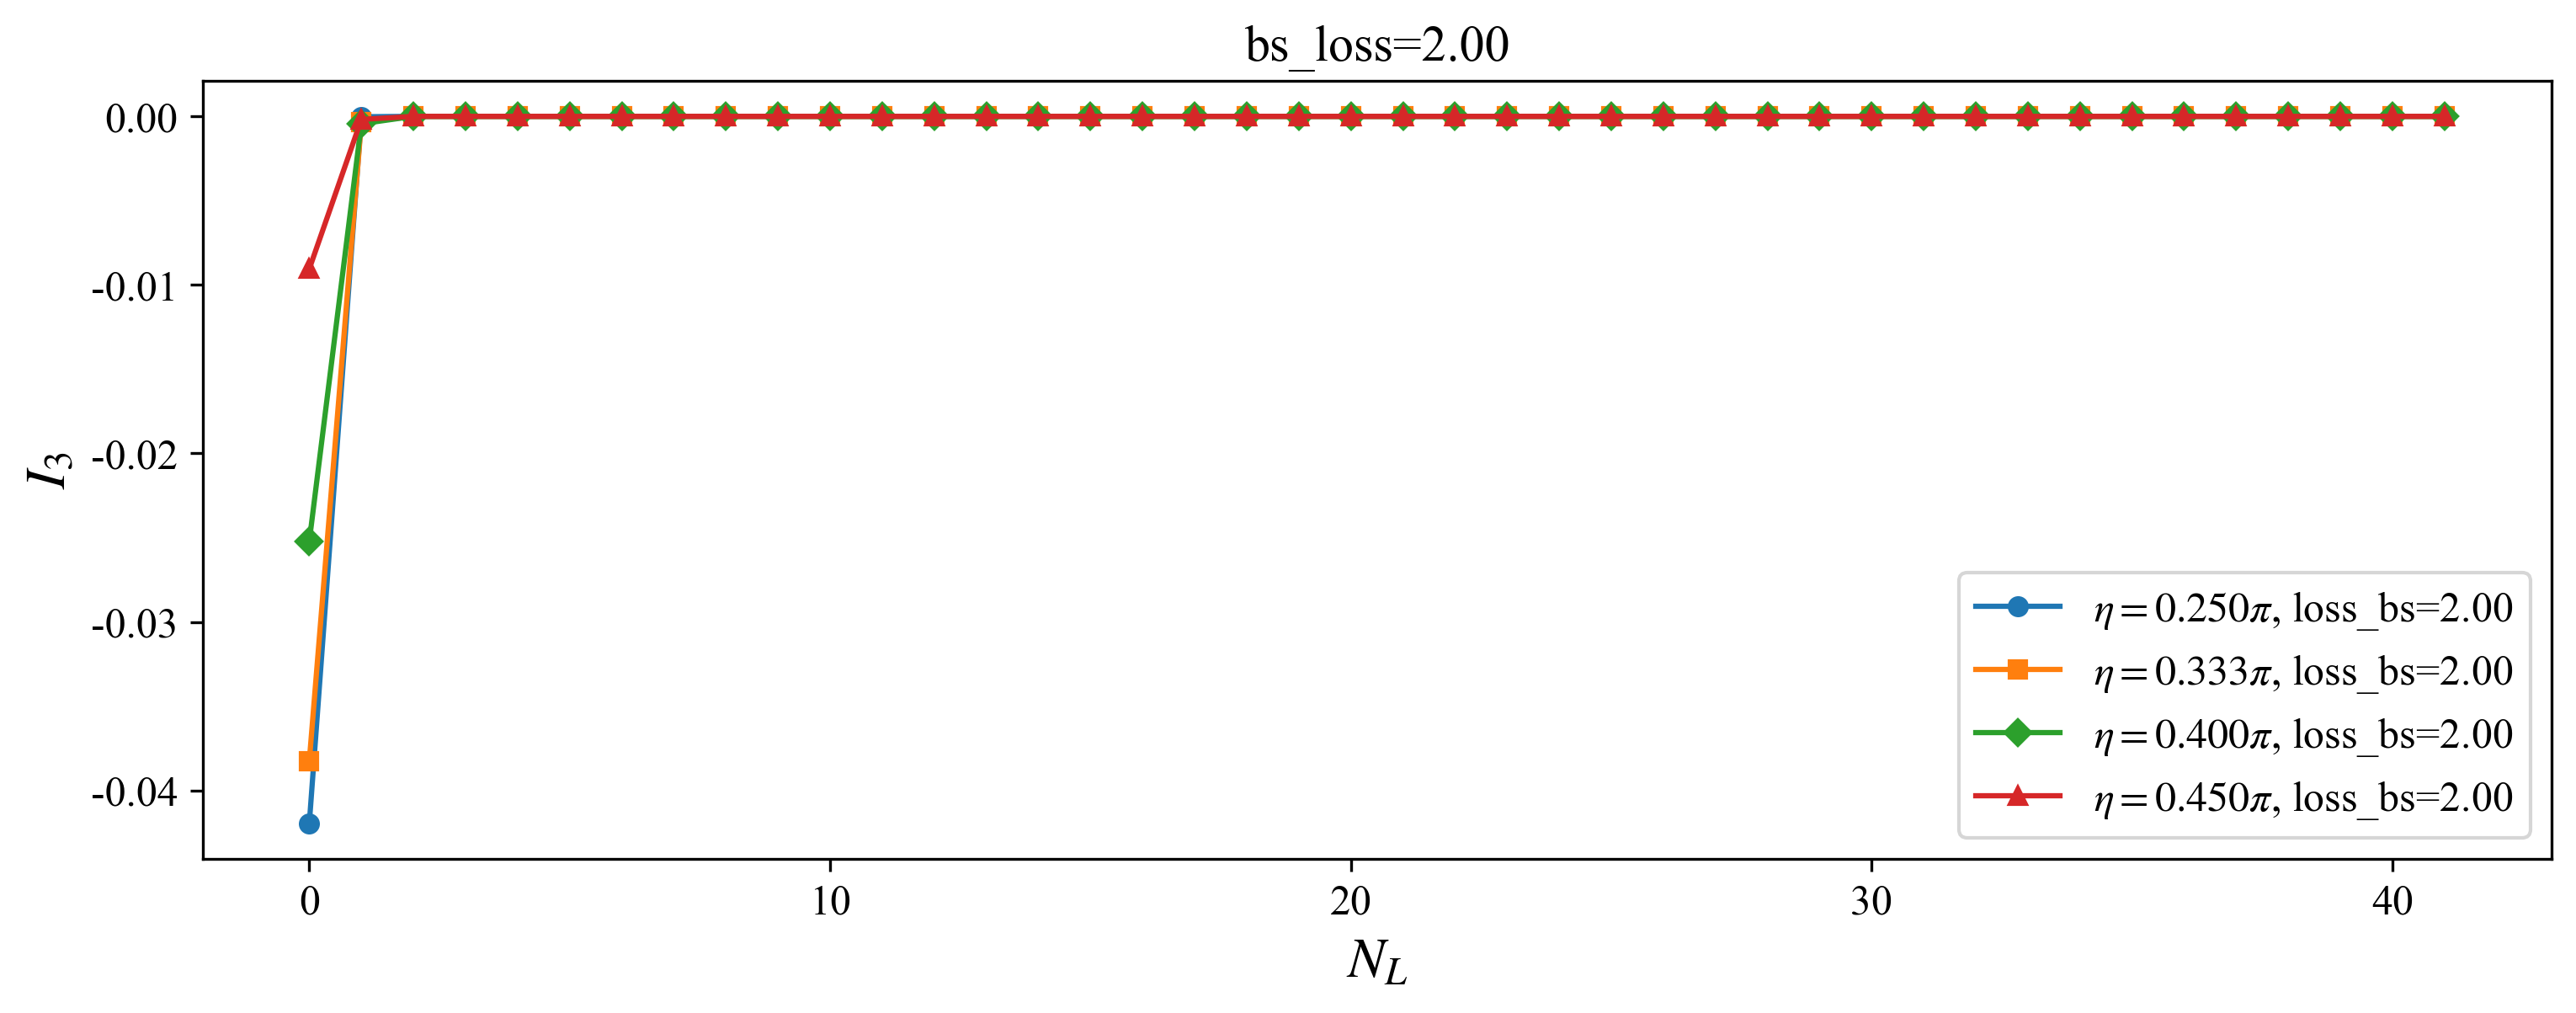

In [19]:
# scale
Ns: int = 1
Nm: int = 2
NL = np.arange(41, -1, -1)

# BS
eta = np.array([1/4, 1/3, 2/5, 9/20])*np.pi

# S2
s_r: float = 0.6
s_phi: float = 0

# PS 
delta_k: float = 0

# S
r_k: float = 1.4
phi_k: float = 0

# loss
if_add_loss: bool = False
if_loss_input : bool = False
loss_amplitude_bs : float = None
loss_input : np.array = None

# additonal features
if_odd_even: bool = False
if_part_computing: bool = False
part_computing_layers: int = 0
if_uncertain_params: bool = False
uncertain_percentage: float = 0.05


I3 = np.zeros((len(eta), len(NL)))
I2_SM12 = np.zeros((len(eta), len(NL)))
I2_SM1 = np.zeros((len(eta), len(NL)))
I2_SM2 = np.zeros((len(eta), len(NL)))


############################
if_add_loss = True
loss_amplitude_bs = 2
############################


for j in tqdm(range(len(NL))):
    for i in range(len(eta)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL[j],  # scale
            eta=eta[i],              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=if_add_loss, loss_amplitude_bs=loss_amplitude_bs,   # loss
            if_odd_even=if_odd_even,     # additonal features
            if_part_computing=if_part_computing  # additonal features
    
        )
        a.compute()

        I3[i, j] = a.I3()
        I2_SM12[i, j] = a.I2_SM12()
        I2_SM1[i, j] = a.I2_SM1()
        I2_SM2[i, j] = a.I2_SM2()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4), dpi=300)
dot = ['o', 's', 'D', '^']
for i in range(len(eta)):
    plt.plot(NL, I3[i, :], 
             label=r'$\eta={:.3f}\pi$, loss_bs={:.2f}'.format(eta[i]/np.pi, loss_amplitude_bs), 
             marker=dot[i], markersize=5)


plt.xlabel(r'$N_L$', fontsize=16)
plt.ylabel(r'$I_3$', fontsize=16)
plt.legend()


plt.title(r'bs_loss={:.2f}'.format(loss_amplitude_bs) )  

plt.savefig(r'pic1\1TMI-loss2.png',
             dpi=300, bbox_inches='tight')



100%|██████████| 42/42 [01:07<00:00,  1.60s/it]


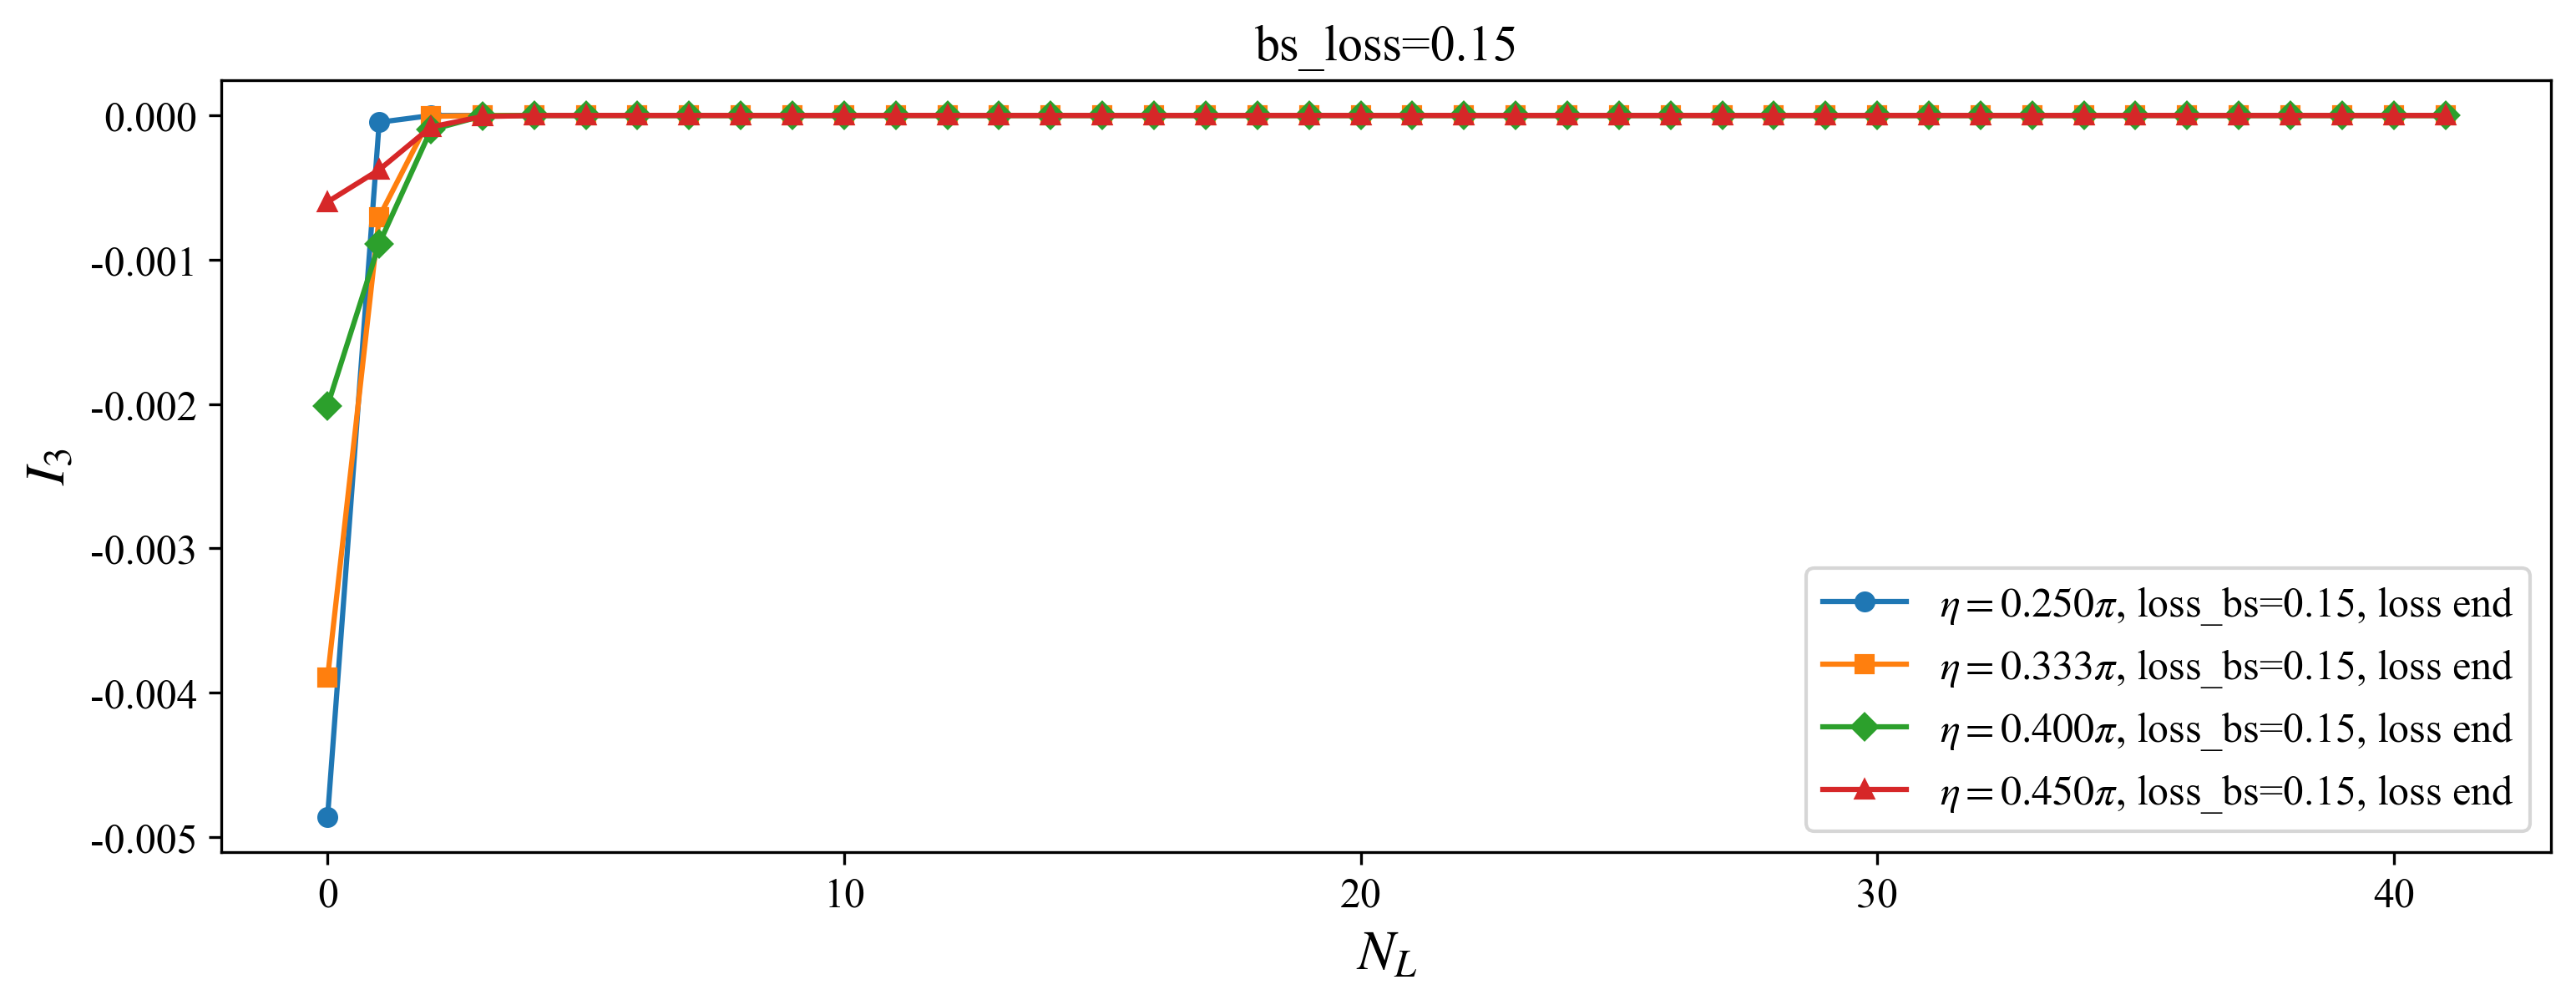

In [12]:
# scale
Ns: int = 1
Nm: int = 2
NL = np.arange(41, -1, -1)

# BS
eta = np.array([1/4, 1/3, 2/5, 9/20])*np.pi

# S2
s_r: float = 0.6
s_phi: float = 0

# PS 
delta_k: float = 0

# S
r_k: float = 1.4
phi_k: float = 0

# loss
if_add_loss: bool = False
if_loss_input : bool = False
loss_amplitude_bs : float = None
loss_input : np.array = None

# additonal features
if_odd_even: bool = False
if_part_computing: bool = False
part_computing_layers: int = 0
if_uncertain_params: bool = False
uncertain_percentage: float = 0.05


I3 = np.zeros((len(eta), len(NL)))
I2_SM12 = np.zeros((len(eta), len(NL)))
I2_SM1 = np.zeros((len(eta), len(NL)))
I2_SM2 = np.zeros((len(eta), len(NL)))


############################
if_add_loss = True
loss_amplitude_bs = 0.15
if_loss_end = True
############################

I3 = np.zeros((len(eta), len(NL)))
I2_SM12 = np.zeros((len(eta), len(NL)))
I2_SM1 = np.zeros((len(eta), len(NL)))
I2_SM2 = np.zeros((len(eta), len(NL)))


for j in tqdm(range(len(NL))):
    for i in range(len(eta)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL[j],  # scale
            eta=eta[i],              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=if_add_loss, loss_amplitude_bs=loss_amplitude_bs,   # loss
            if_odd_even=if_odd_even,     # additonal features
            if_part_computing=if_part_computing,  # additonal features
            if_loss_end=if_loss_end,
    
        )
        a.compute()

        I3[i, j] = a.I3()
        I2_SM12[i, j] = a.I2_SM12()
        I2_SM1[i, j] = a.I2_SM1()
        I2_SM2[i, j] = a.I2_SM2()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4), dpi=300)
dot = ['o', 's', 'D', '^']
for i in range(len(eta)):
    plt.plot(NL, I3[i, :], 
             label=r'$\eta={:.3f}\pi$, loss_bs={:.2f}, loss end'.format(eta[i]/np.pi, loss_amplitude_bs), 
             marker=dot[i], markersize=5)
plt.xlabel(r'$N_L$', fontsize=16)
plt.ylabel(r'$I_3$', fontsize=16)
plt.legend()


plt.title(r'bs_loss={:.2f}'.format(loss_amplitude_bs) )  

plt.savefig(r'pic1\1TMI-loss-end.png',
             dpi=300, bbox_inches='tight')



100%|██████████| 42/42 [04:57<00:00,  7.09s/it]


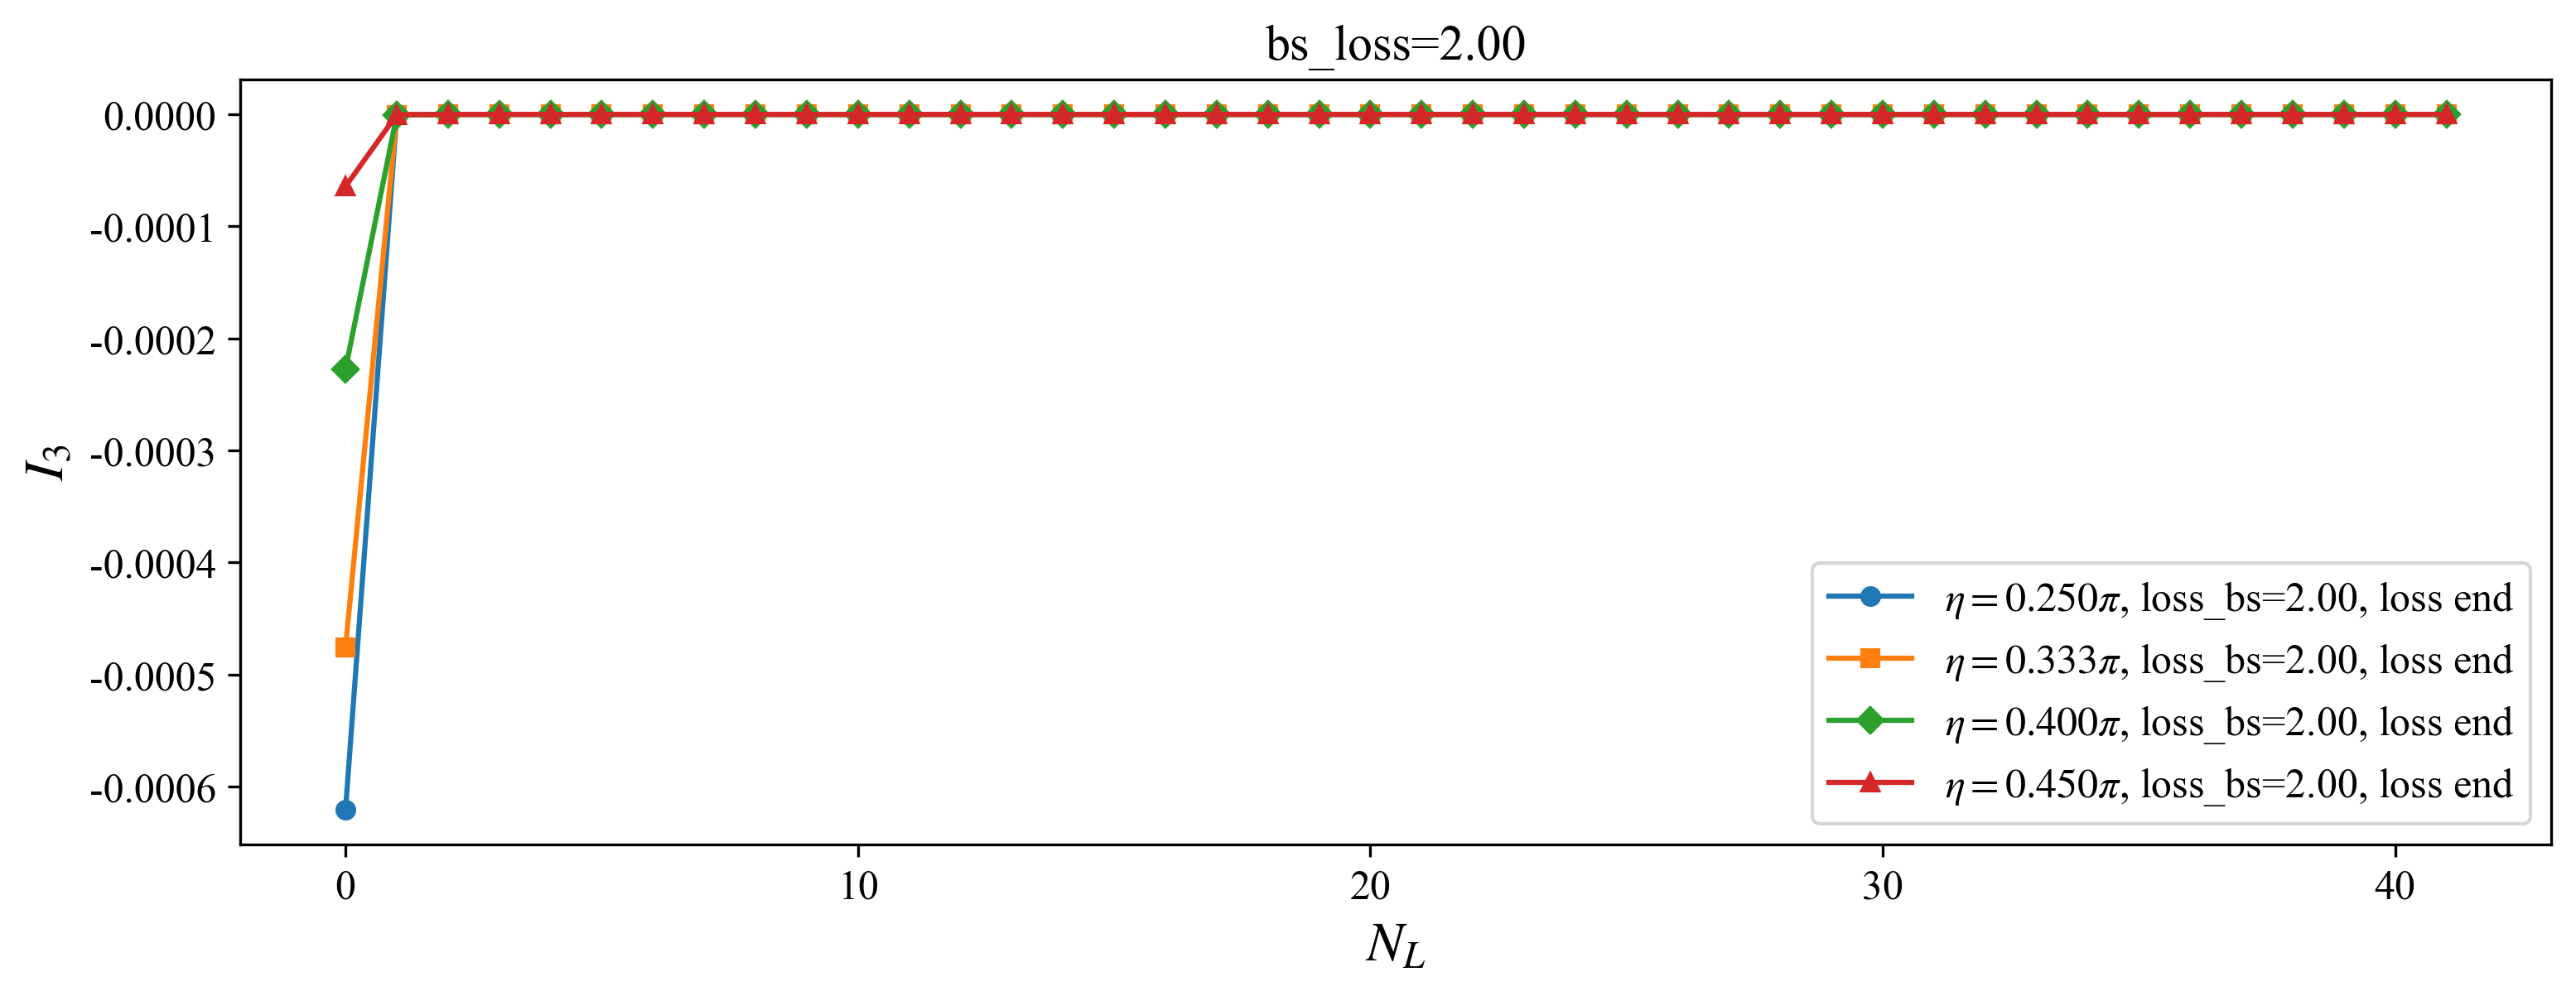

In [20]:
# scale
Ns: int = 1
Nm: int = 2
NL = np.arange(41, -1, -1)

# BS
eta = np.array([1/4, 1/3, 2/5, 9/20])*np.pi

# S2
s_r: float = 0.6
s_phi: float = 0

# PS 
delta_k: float = 0

# S
r_k: float = 1.4
phi_k: float = 0

# loss
if_add_loss: bool = False
if_loss_input : bool = False
loss_amplitude_bs : float = None
loss_input : np.array = None

# additonal features
if_odd_even: bool = False
if_part_computing: bool = False
part_computing_layers: int = 0
if_uncertain_params: bool = False
uncertain_percentage: float = 0.05


I3 = np.zeros((len(eta), len(NL)))
I2_SM12 = np.zeros((len(eta), len(NL)))
I2_SM1 = np.zeros((len(eta), len(NL)))
I2_SM2 = np.zeros((len(eta), len(NL)))


############################
if_add_loss = True
loss_amplitude_bs = 2
if_loss_end = True
############################

I3 = np.zeros((len(eta), len(NL)))
I2_SM12 = np.zeros((len(eta), len(NL)))
I2_SM1 = np.zeros((len(eta), len(NL)))
I2_SM2 = np.zeros((len(eta), len(NL)))


for j in tqdm(range(len(NL))):
    for i in range(len(eta)):

        a = CV.TripartiteMutualInformation(
            Ns=Ns, Nm=Nm, NL=NL[j],  # scale
            eta=eta[i],              # BS
            s_r=s_r, s_phi=s_phi, # S2
            delta_k=delta_k,      # PS
            r_k=r_k, phi_k=phi_k, # S
            if_add_loss=if_add_loss, loss_amplitude_bs=loss_amplitude_bs,   # loss
            if_odd_even=if_odd_even,     # additonal features
            if_part_computing=if_part_computing,  # additonal features
            if_loss_end=if_loss_end,
    
        )
        a.compute()

        I3[i, j] = a.I3()
        I2_SM12[i, j] = a.I2_SM12()
        I2_SM1[i, j] = a.I2_SM1()
        I2_SM2[i, j] = a.I2_SM2()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4), dpi=300)
dot = ['o', 's', 'D', '^']
for i in range(len(eta)):
    plt.plot(NL, I3[i, :], 
             label=r'$\eta={:.3f}\pi$, loss_bs={:.2f}, loss end'.format(eta[i]/np.pi, loss_amplitude_bs), 
             marker=dot[i], markersize=5)
plt.xlabel(r'$N_L$', fontsize=16)
plt.ylabel(r'$I_3$', fontsize=16)
plt.legend()


plt.title(r'bs_loss={:.2f}'.format(loss_amplitude_bs) )  

plt.savefig(r'pic1\1TMI-loss-end2.png',
             dpi=300, bbox_inches='tight')



100%|██████████| 42/42 [00:16<00:00,  2.47it/s]


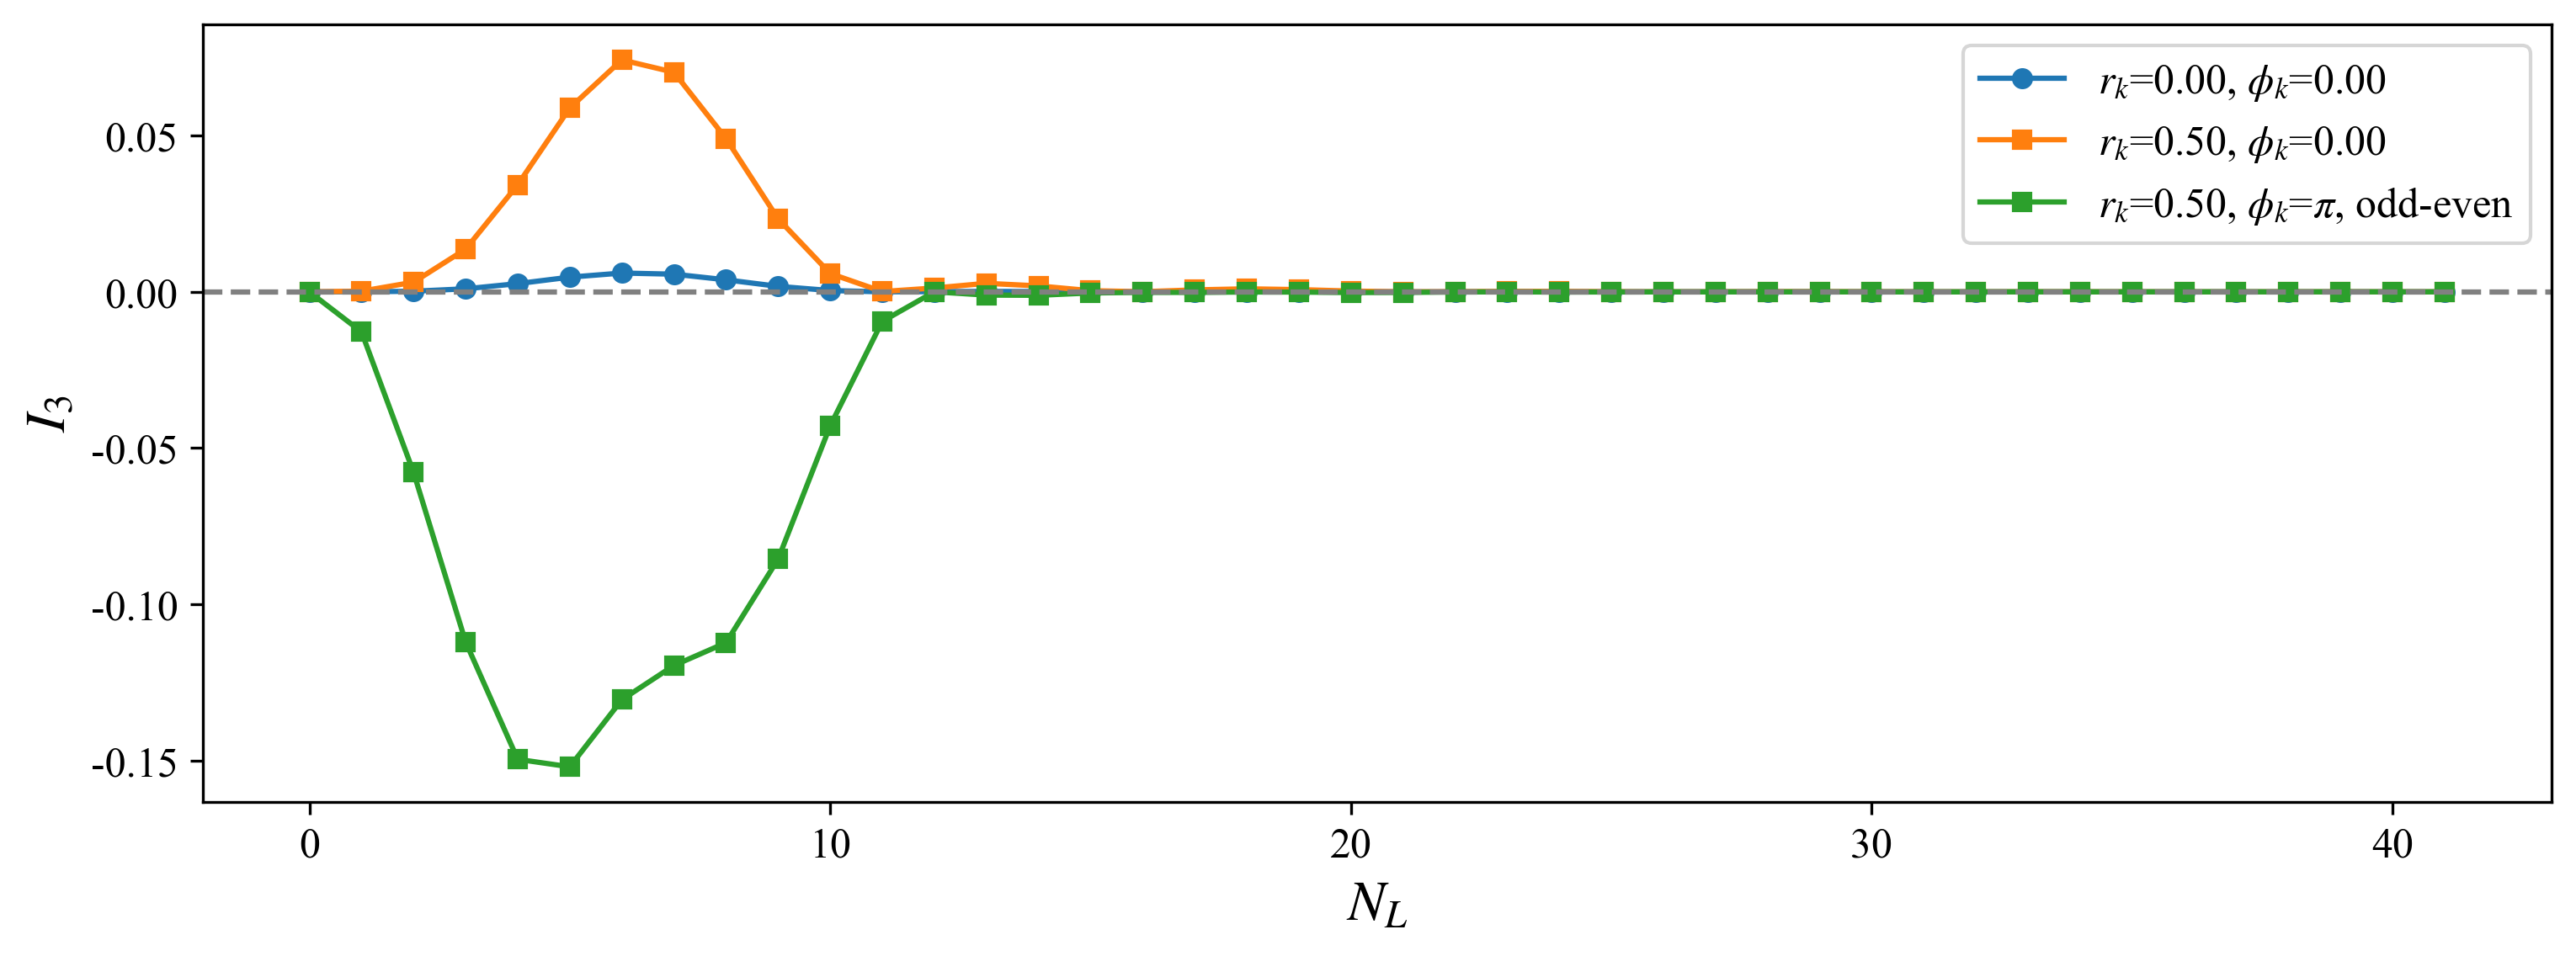

In [13]:
# scale
Ns: int = 1
Nm: int = 2
NL = np.arange(41, -1, -1)

# BS
eta = 9/20*np.pi

# S2
s_r: float = 0.6
s_phi: float = 0

# PS 
delta_k: float = 0

# S
r_k: float = 0.5
phi_k: float = 0

# loss
if_add_loss: bool = False
if_loss_input : bool = False
loss_amplitude_bs : float = None
loss_input : np.array = None

# additonal features
if_odd_even: bool = False
if_part_computing: bool = False
part_computing_layers: int = 0
if_uncertain_params: bool = False
uncertain_percentage: float = 0.05


I3 = np.zeros(len(NL))
I2_SM12 = np.zeros(len(NL))

plt.figure(figsize=(12, 4), dpi=300)
################################
s_r = 0.5
r_k = 0
phi_k = 0

for j in tqdm(range(len(NL))):

    a = CV.TripartiteMutualInformation(
        Ns=Ns, Nm=Nm, NL=NL[j],  # scale
        eta=eta,              # BS
        s_r=s_r, s_phi=s_phi, # S2
        delta_k=delta_k,      # PS
        r_k=r_k, phi_k=phi_k, # S
        if_add_loss=if_add_loss,    # loss
        if_odd_even=if_odd_even,     # additonal features
        if_part_computing=if_part_computing  # additonal features
    )
    a.compute()

    I3[j] = a.I3()
    I2_SM12[j] = a.I2_SM12()


plt.plot(NL, I3, 
            label=r'$r_k$={:.2f}, $\phi_k$={:.2f}'.format(r_k, phi_k),
            marker='o', markersize=5)

# ################################
s_r: float = 0.5
r_k = 0.5
phi_k = 0

for j in tqdm(range(len(NL))):

    a = CV.TripartiteMutualInformation(
        Ns=Ns, Nm=Nm, NL=NL[j],  # scale
        eta=eta,              # BS
        s_r=s_r, s_phi=s_phi, # S2
        delta_k=delta_k,      # PS
        r_k=r_k, phi_k=phi_k, # S
        if_add_loss=if_add_loss,    # loss
        if_odd_even=if_odd_even,     # additonal features
        if_part_computing=if_part_computing  # additonal features
    )
    a.compute()
    I3[j] = a.I3()
    I2_SM12[j] = a.I2_SM12()

plt.plot(NL, I3, 
            label=r'$r_k$={:.2f}, $\phi_k$={:.2f}'.format(r_k, phi_k),
            marker='s', markersize=5)

################################
s_r: float = 0.5
r_k = 0.5
phi_k = np.pi
if_odd_even = True

for j in tqdm(range(len(NL))):

    a = CV.TripartiteMutualInformation(
        Ns=Ns, Nm=Nm, NL=NL[j],  # scale
        eta=eta,              # BS
        s_r=s_r, s_phi=s_phi, # S2
        delta_k=delta_k,      # PS
        r_k=r_k, phi_k=phi_k, # S
        if_add_loss=if_add_loss,    # loss
        if_odd_even=if_odd_even,     # additonal features
        if_part_computing=if_part_computing  # additonal features
    )
    a.compute()
    I3[j] = a.I3()
    I2_SM12[j] = a.I2_SM12()

plt.plot(NL, I3, 
            label=r'$r_k$={:.2f}, $\phi_k$=$\pi$, odd-even'.format(r_k),
            marker='s', markersize=5)

################################

################################

# 加水平横线
plt.axhline(y=0, color='gray', linestyle='--')

plt.xlabel(r'$N_L$', fontsize=16)
plt.ylabel(r'$I_3$', fontsize=16)
plt.legend()
# plt.title(r'loss for each component/pure waveguide path =${}\mu m$*0.12dB/$\mu m$={}dB'.format(length, length*0.12), fontsize=16)
plt.savefig(r'pic1\2TMI.png', 
            dpi=300, bbox_inches='tight')



100%|██████████| 42/42 [00:16<00:00,  2.59it/s]


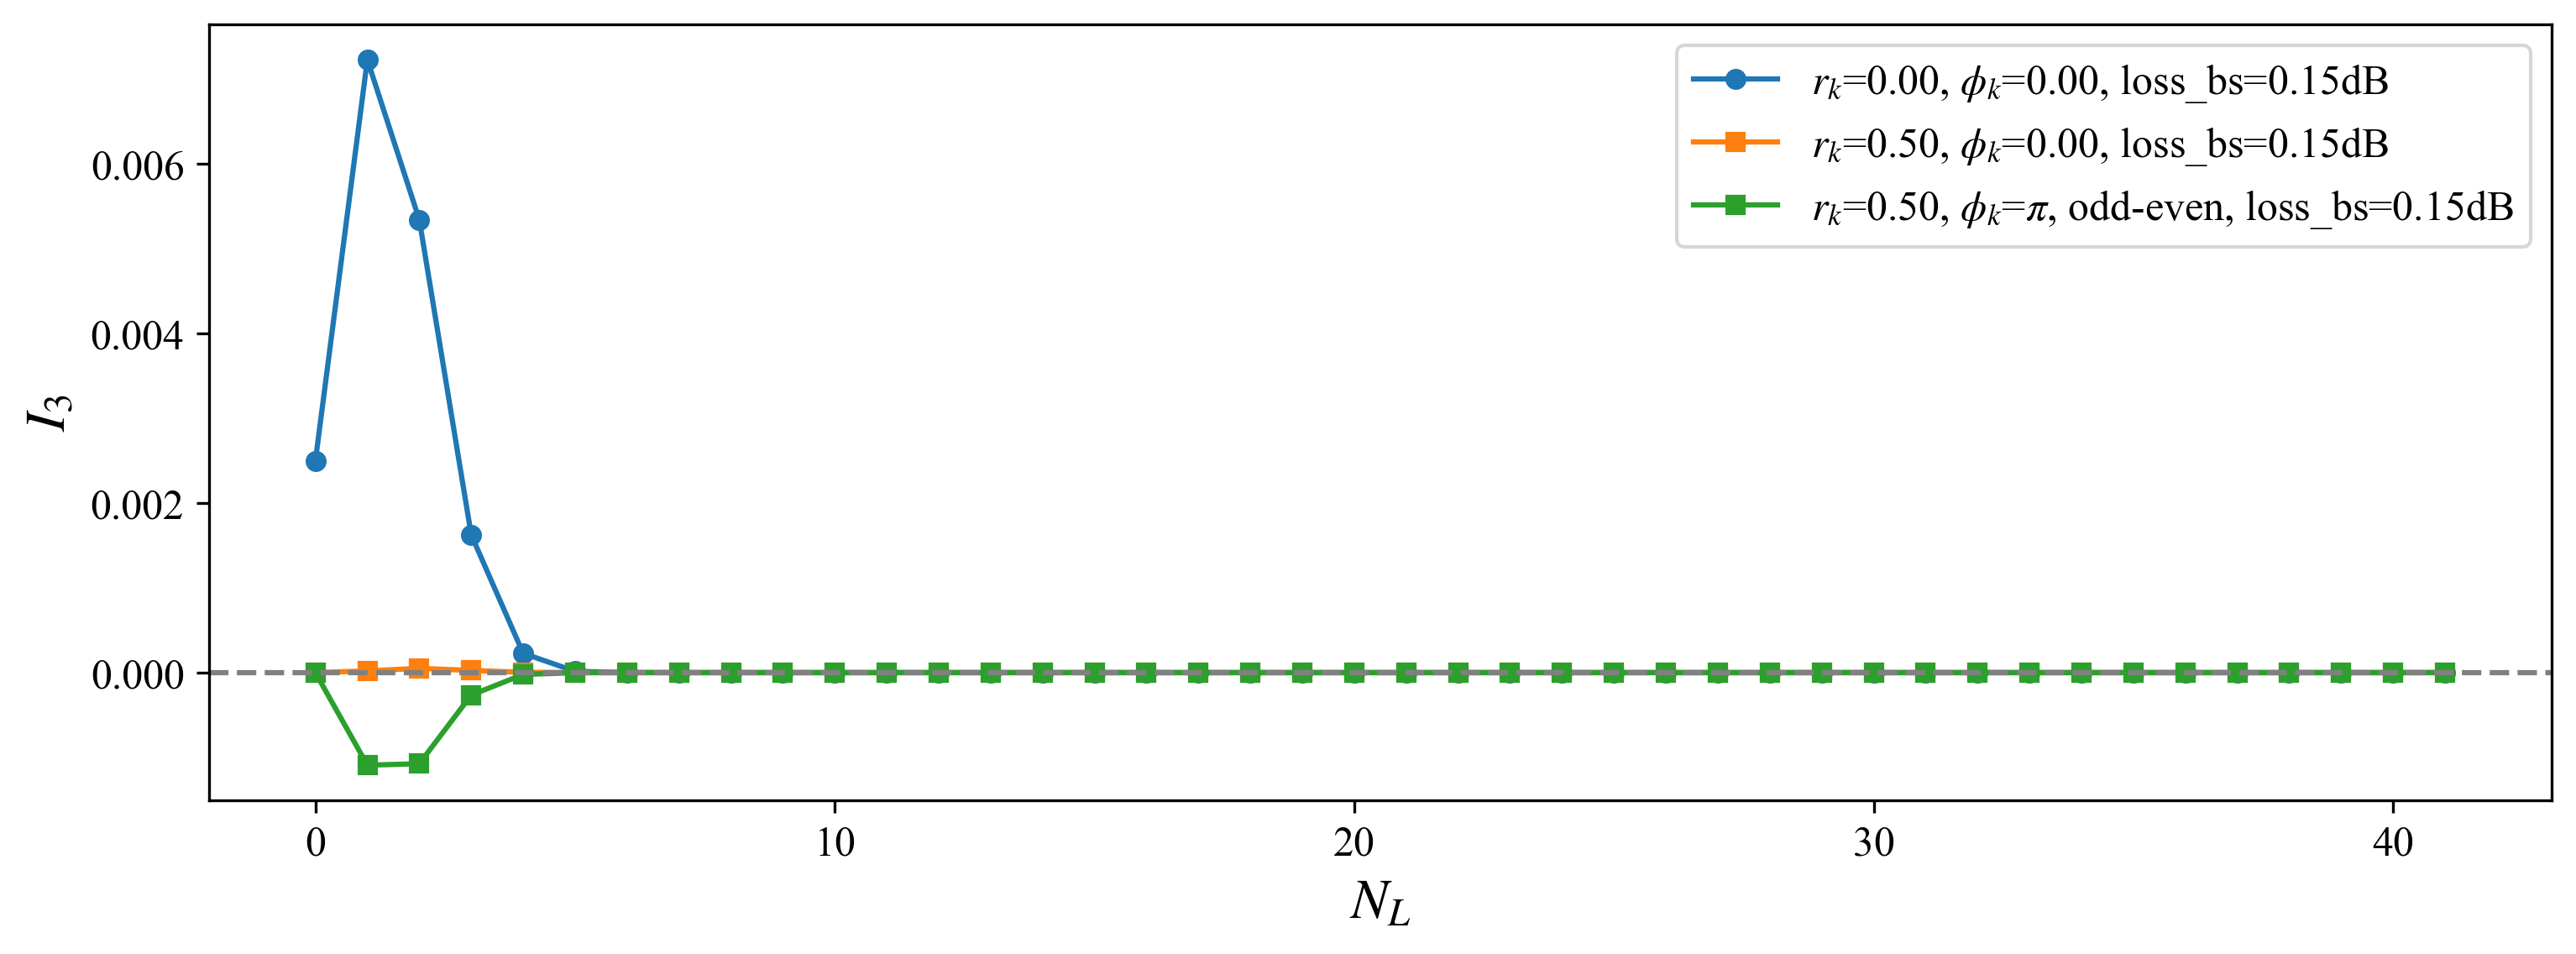

In [14]:
# scale
Ns: int = 1
Nm: int = 2
NL = np.arange(41, -1, -1)

# BS
eta = 9/20*np.pi

# S2
s_r: float = 0.6
s_phi: float = 0

# PS 
delta_k: float = 0

# S
r_k: float = 0.5
phi_k: float = 0

# loss
if_add_loss: bool = False
if_loss_input : bool = False
loss_amplitude_bs : float = None
loss_input : np.array = None

# additonal features
if_odd_even: bool = False
if_part_computing: bool = False
part_computing_layers: int = 0
if_uncertain_params: bool = False
uncertain_percentage: float = 0.05


I3 = np.zeros(len(NL))
I2_SM12 = np.zeros(len(NL))

plt.figure(figsize=(12, 4), dpi=300)


################################
################################
s_r = 0.5
r_k = 0
phi_k = 0
if_add_loss = True
loss_amplitude_bs = 0.15

for j in tqdm(range(len(NL))):

    a = CV.TripartiteMutualInformation(
        Ns=Ns, Nm=Nm, NL=NL[j],  # scale
        eta=eta,              # BS
        s_r=s_r, s_phi=s_phi, # S2
        delta_k=delta_k,      # PS
        r_k=r_k, phi_k=phi_k, # S
        if_add_loss=if_add_loss, loss_amplitude_bs=loss_amplitude_bs,   # loss
        if_odd_even=if_odd_even,     # additonal features
        if_part_computing=if_part_computing  # additonal features
    )
    a.compute()

    I3[j] = a.I3()
    I2_SM12[j] = a.I2_SM12()


plt.plot(NL, I3, 
            label=r'$r_k$={:.2f}, $\phi_k$={:.2f}, loss_bs={:.2f}dB'.format(r_k, phi_k, loss_amplitude_bs),
            marker='o', markersize=5)

# ################################
s_r: float = 0.5
r_k = 0.5
phi_k = 0
if_add_loss = True
loss_amplitude_bs = 0.15

for j in tqdm(range(len(NL))):

    a = CV.TripartiteMutualInformation(
        Ns=Ns, Nm=Nm, NL=NL[j],  # scale
        eta=eta,              # BS
        s_r=s_r, s_phi=s_phi, # S2
        delta_k=delta_k,      # PS
        r_k=r_k, phi_k=phi_k, # S
        if_add_loss=if_add_loss, loss_amplitude_bs=loss_amplitude_bs,    # loss
        if_odd_even=if_odd_even,     # additonal features
        if_part_computing=if_part_computing  # additonal features
    )
    a.compute()
    I3[j] = a.I3()
    I2_SM12[j] = a.I2_SM12()

plt.plot(NL, I3, 
            label=r'$r_k$={:.2f}, $\phi_k$={:.2f}, loss_bs={:.2f}dB'.format(r_k, phi_k, loss_amplitude_bs),
            marker='s', markersize=5)

################################
s_r: float = 0.5
r_k = 0.5
phi_k = np.pi
if_odd_even = True
if_add_loss = True
loss_amplitude_bs = 0.15

for j in tqdm(range(len(NL))):

    a = CV.TripartiteMutualInformation(
        Ns=Ns, Nm=Nm, NL=NL[j],  # scale
        eta=eta,              # BS
        s_r=s_r, s_phi=s_phi, # S2
        delta_k=delta_k,      # PS
        r_k=r_k, phi_k=phi_k, # S
        if_add_loss=if_add_loss,  loss_amplitude_bs=loss_amplitude_bs,   # loss
        if_odd_even=if_odd_even,     # additonal features
        if_part_computing=if_part_computing  # additonal features
    )
    a.compute()
    I3[j] = a.I3()
    I2_SM12[j] = a.I2_SM12()

plt.plot(NL, I3, 
            label=r'$r_k$={:.2f}, $\phi_k$=$\pi$, odd-even, loss_bs={:.2f}dB'.format(r_k, loss_amplitude_bs),
            marker='s', markersize=5)

################################

################################

# 加水平横线
plt.axhline(y=0, color='gray', linestyle='--')

plt.xlabel(r'$N_L$', fontsize=16)
plt.ylabel(r'$I_3$', fontsize=16)
plt.legend()
plt.savefig(r'pic1\2TMI-loss.png', 
            dpi=300, bbox_inches='tight')



100%|██████████| 42/42 [00:27<00:00,  1.52it/s]


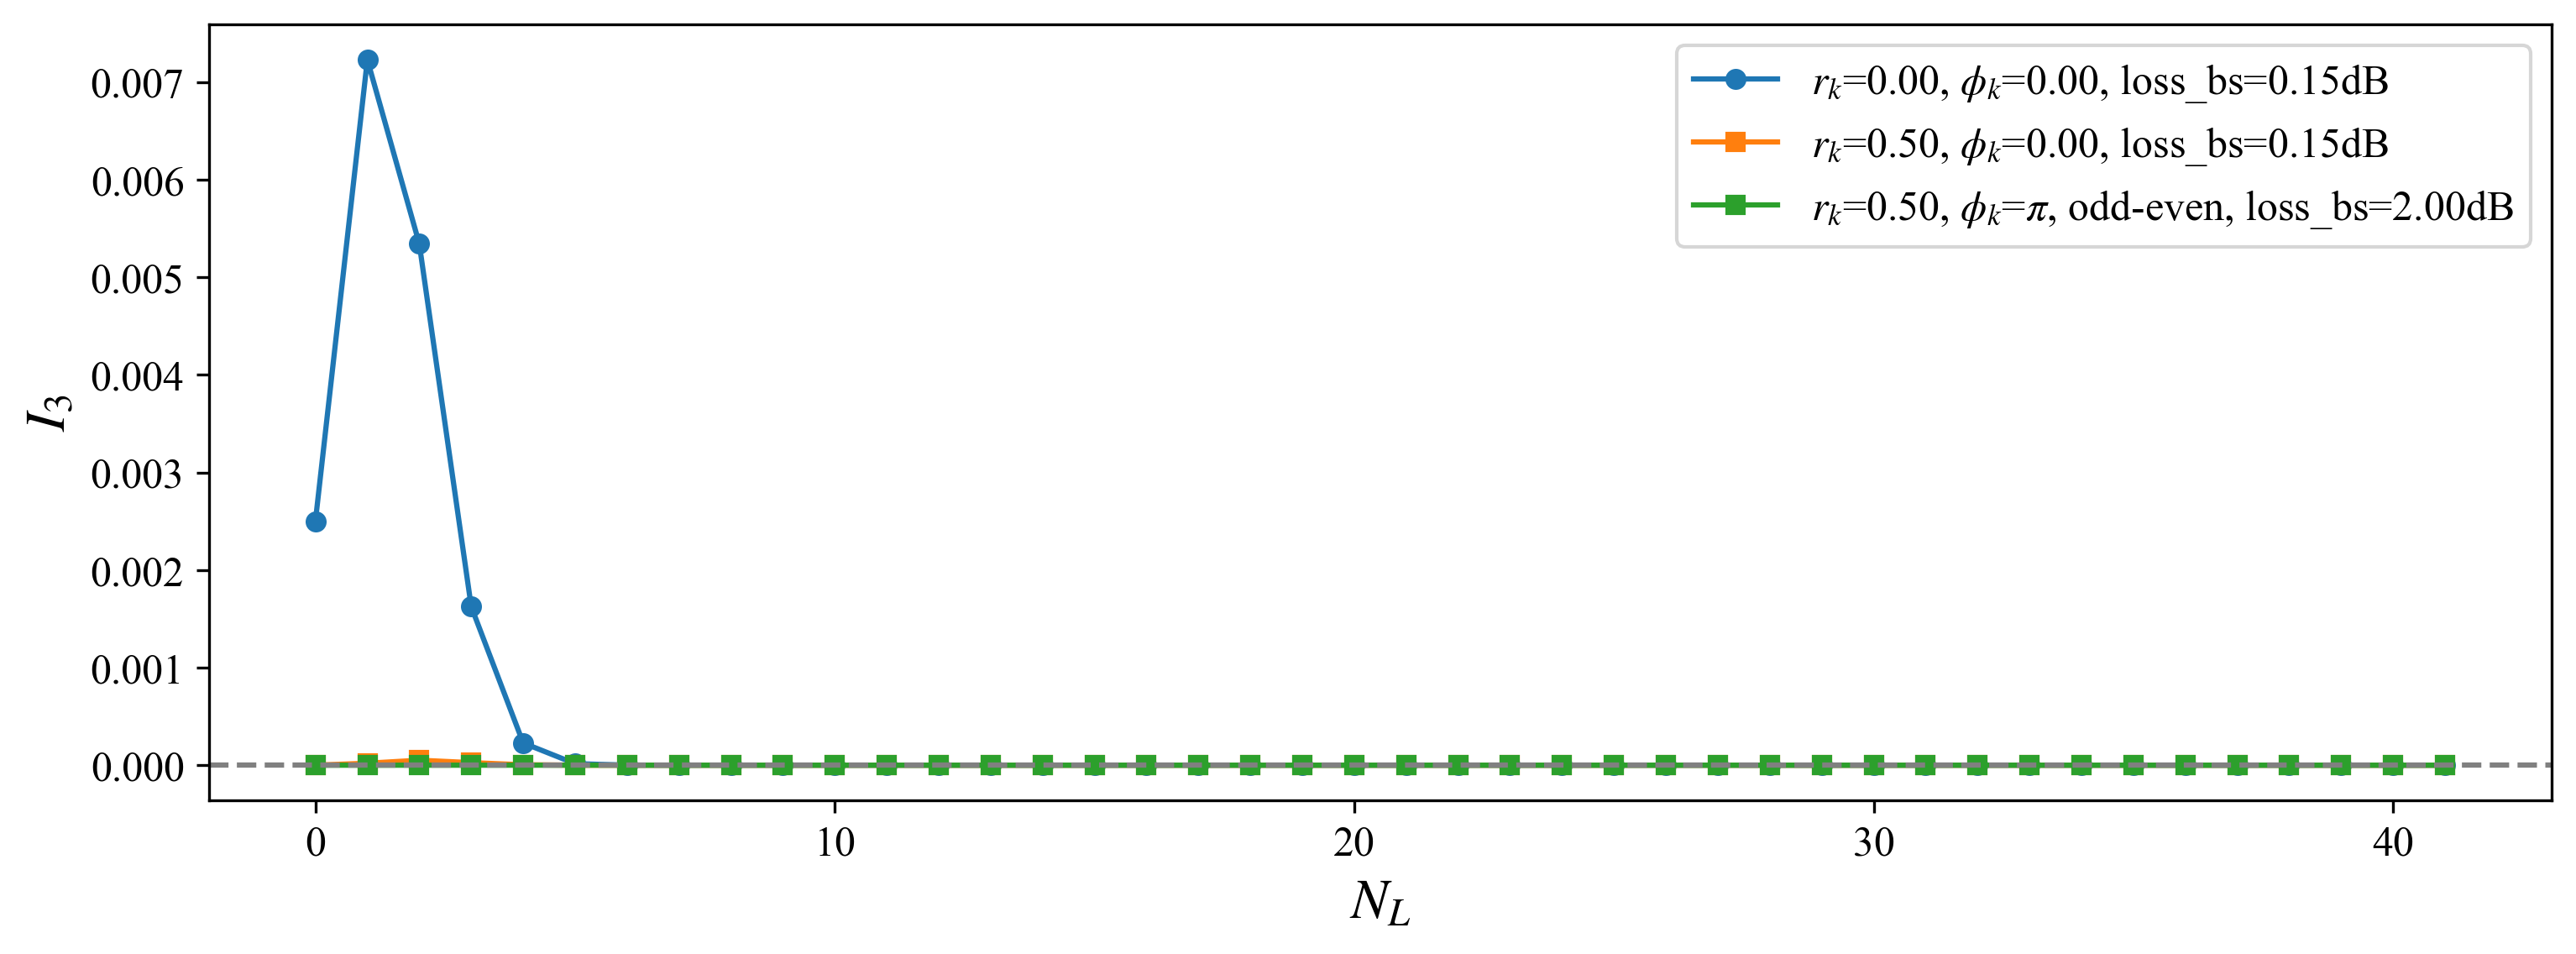

In [22]:
# scale
Ns: int = 1
Nm: int = 2
NL = np.arange(41, -1, -1)

# BS
eta = 9/20*np.pi

# S2
s_r: float = 0.6
s_phi: float = 0

# PS 
delta_k: float = 0

# S
r_k: float = 0.5
phi_k: float = 0

# loss
if_add_loss: bool = False
if_loss_input : bool = False
loss_amplitude_bs : float = None
loss_input : np.array = None

# additonal features
if_odd_even: bool = False
if_part_computing: bool = False
part_computing_layers: int = 0
if_uncertain_params: bool = False
uncertain_percentage: float = 0.05


I3 = np.zeros(len(NL))
I2_SM12 = np.zeros(len(NL))

plt.figure(figsize=(12, 4), dpi=300)


################################
################################
s_r = 0.5
r_k = 0
phi_k = 0
if_add_loss = True
loss_amplitude_bs = 0.15

for j in tqdm(range(len(NL))):

    a = CV.TripartiteMutualInformation(
        Ns=Ns, Nm=Nm, NL=NL[j],  # scale
        eta=eta,              # BS
        s_r=s_r, s_phi=s_phi, # S2
        delta_k=delta_k,      # PS
        r_k=r_k, phi_k=phi_k, # S
        if_add_loss=if_add_loss, loss_amplitude_bs=loss_amplitude_bs,   # loss
        if_odd_even=if_odd_even,     # additonal features
        if_part_computing=if_part_computing  # additonal features
    )
    a.compute()

    I3[j] = a.I3()
    I2_SM12[j] = a.I2_SM12()


plt.plot(NL, I3, 
            label=r'$r_k$={:.2f}, $\phi_k$={:.2f}, loss_bs={:.2f}dB'.format(r_k, phi_k, loss_amplitude_bs),
            marker='o', markersize=5)

# ################################
s_r: float = 0.5
r_k = 0.5
phi_k = 0
if_add_loss = True
loss_amplitude_bs = 0.15

for j in tqdm(range(len(NL))):

    a = CV.TripartiteMutualInformation(
        Ns=Ns, Nm=Nm, NL=NL[j],  # scale
        eta=eta,              # BS
        s_r=s_r, s_phi=s_phi, # S2
        delta_k=delta_k,      # PS
        r_k=r_k, phi_k=phi_k, # S
        if_add_loss=if_add_loss, loss_amplitude_bs=loss_amplitude_bs,    # loss
        if_odd_even=if_odd_even,     # additonal features
        if_part_computing=if_part_computing  # additonal features
    )
    a.compute()
    I3[j] = a.I3()
    I2_SM12[j] = a.I2_SM12()

plt.plot(NL, I3, 
            label=r'$r_k$={:.2f}, $\phi_k$={:.2f}, loss_bs={:.2f}dB'.format(r_k, phi_k, loss_amplitude_bs),
            marker='s', markersize=5)

################################
s_r: float = 0.5
r_k = 0.5
phi_k = np.pi
if_odd_even = True
if_add_loss = True
loss_amplitude_bs = 2

for j in tqdm(range(len(NL))):

    a = CV.TripartiteMutualInformation(
        Ns=Ns, Nm=Nm, NL=NL[j],  # scale
        eta=eta,              # BS
        s_r=s_r, s_phi=s_phi, # S2
        delta_k=delta_k,      # PS
        r_k=r_k, phi_k=phi_k, # S
        if_add_loss=if_add_loss,  loss_amplitude_bs=loss_amplitude_bs,   # loss
        if_odd_even=if_odd_even,     # additonal features
        if_part_computing=if_part_computing  # additonal features
    )
    a.compute()
    I3[j] = a.I3()
    I2_SM12[j] = a.I2_SM12()

plt.plot(NL, I3, 
            label=r'$r_k$={:.2f}, $\phi_k$=$\pi$, odd-even, loss_bs={:.2f}dB'.format(r_k, loss_amplitude_bs),
            marker='s', markersize=5)

################################

################################

# 加水平横线
plt.axhline(y=0, color='gray', linestyle='--')

plt.xlabel(r'$N_L$', fontsize=16)
plt.ylabel(r'$I_3$', fontsize=16)
plt.legend()
plt.savefig(r'pic1\2TMI-loss2.png', 
            dpi=300, bbox_inches='tight')



100%|██████████| 42/42 [00:17<00:00,  2.45it/s]


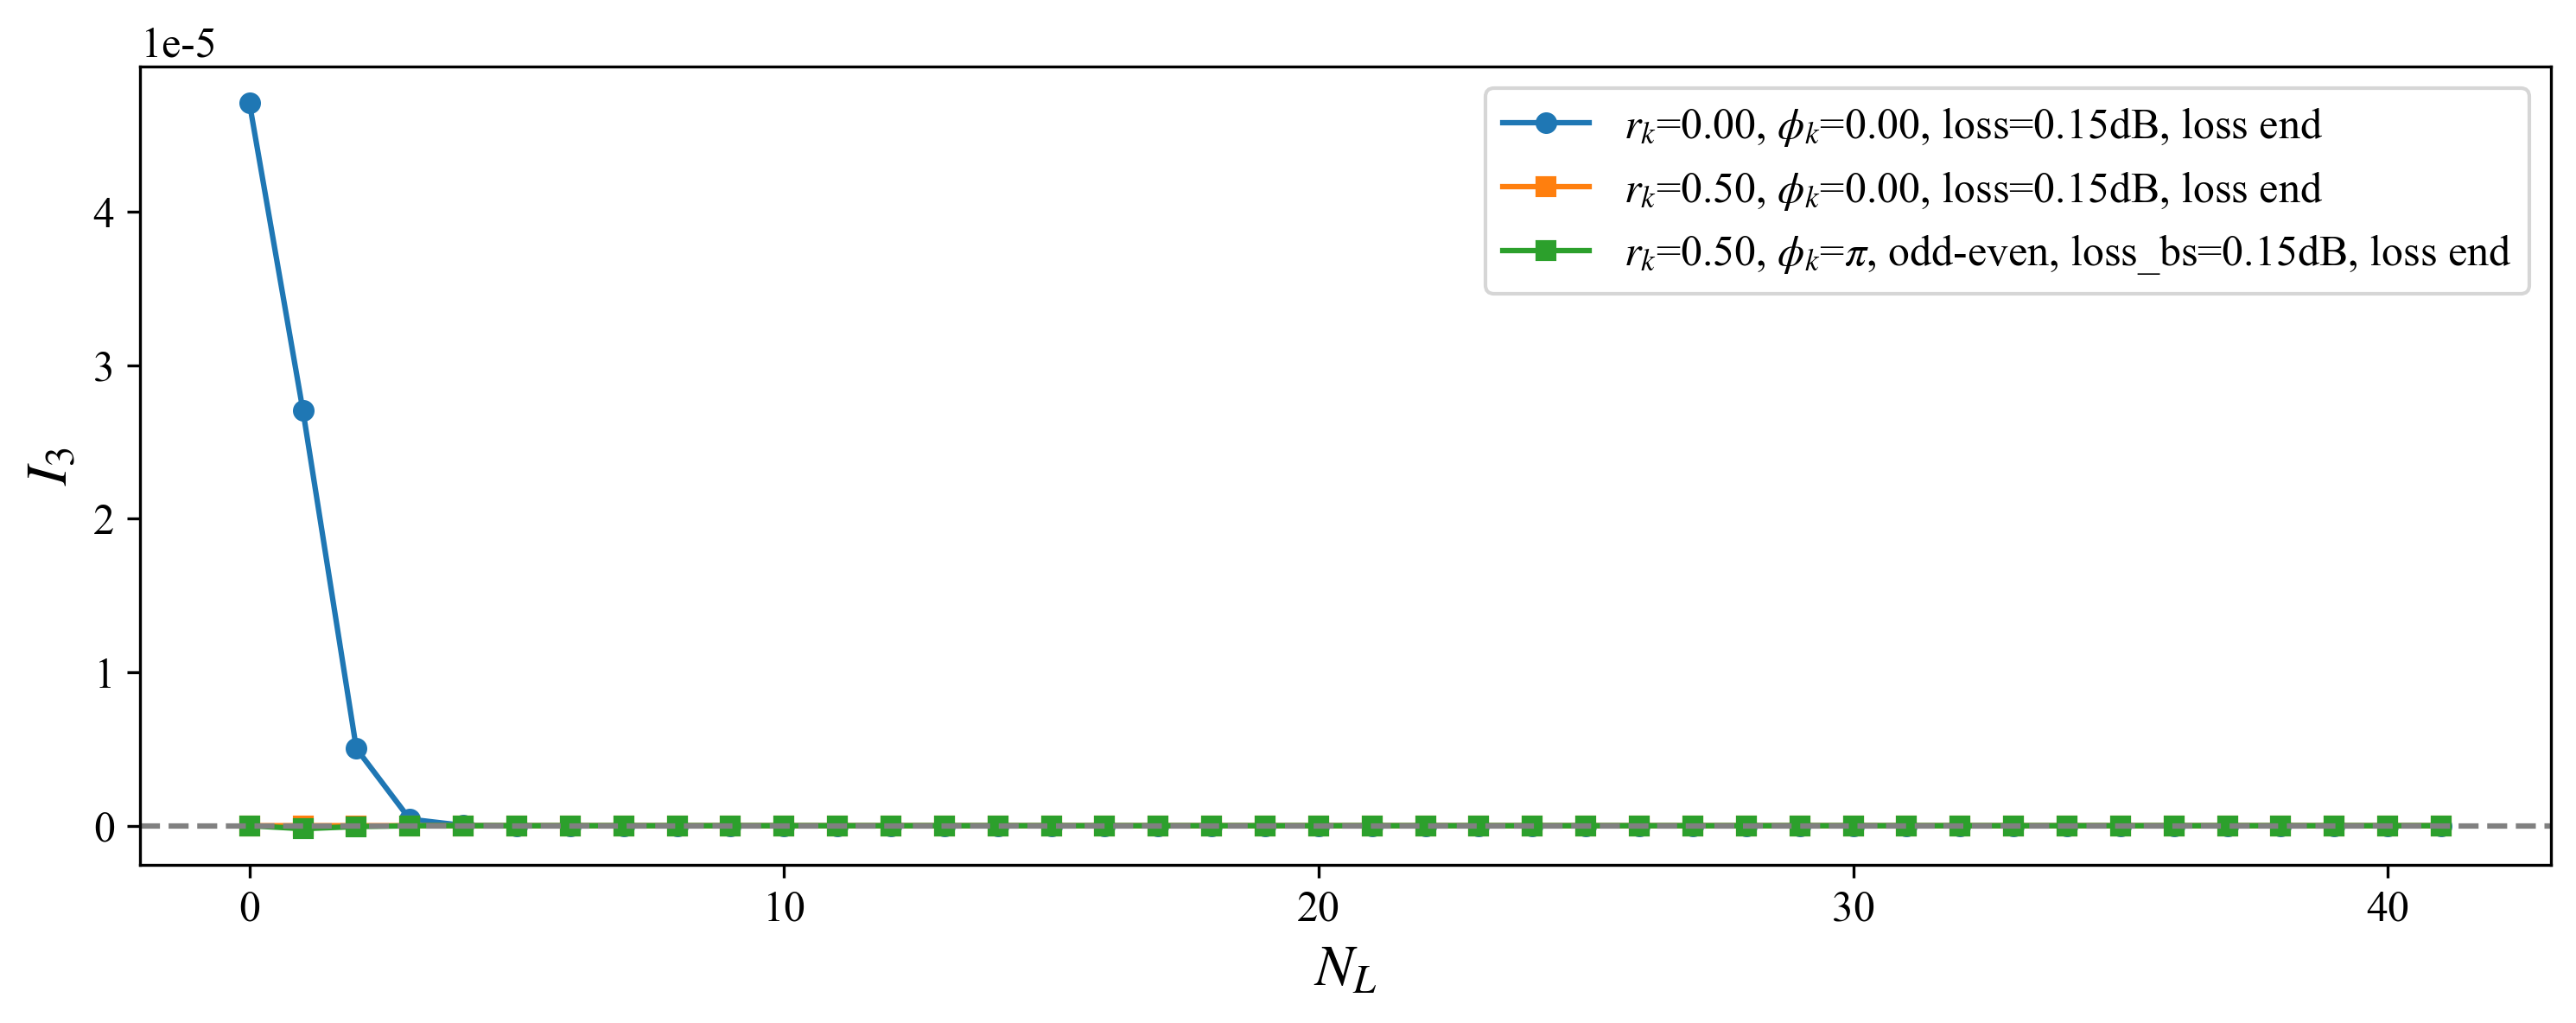

In [15]:
# scale
Ns: int = 1
Nm: int = 2
NL = np.arange(41, -1, -1)

# BS
eta = 9/20*np.pi

# S2
s_r: float = 0.6
s_phi: float = 0

# PS 
delta_k: float = 0

# S
r_k: float = 0.5
phi_k: float = 0

# loss
if_add_loss: bool = False
if_loss_input : bool = False
loss_amplitude_bs : float = None
loss_input : np.array = None

# additonal features
if_odd_even: bool = False
if_part_computing: bool = False
part_computing_layers: int = 0
if_uncertain_params: bool = False
uncertain_percentage: float = 0.05


I3 = np.zeros(len(NL))
I2_SM12 = np.zeros(len(NL))

plt.figure(figsize=(12, 4), dpi=300)


## loss end
################################
s_r = 0.5
r_k = 0
phi_k = 0
if_add_loss = True
loss_amplitude_bs = 0.15
if_loss_end = True

for j in tqdm(range(len(NL))):

    a = CV.TripartiteMutualInformation(
        Ns=Ns, Nm=Nm, NL=NL[j],  # scale
        eta=eta,              # BS
        s_r=s_r, s_phi=s_phi, # S2
        delta_k=delta_k,      # PS
        r_k=r_k, phi_k=phi_k, # S
        if_add_loss=if_add_loss, loss_amplitude_bs=loss_amplitude_bs,   # loss
        if_odd_even=if_odd_even,     # additonal features
        if_part_computing=if_part_computing,  # additonal features
        if_loss_end=if_loss_end,
    )
    a.compute()

    I3[j] = a.I3()
    I2_SM12[j] = a.I2_SM12()


plt.plot(NL, I3, 
            label=r'$r_k$={:.2f}, $\phi_k$={:.2f}, loss={:.2f}dB, loss end'.format(r_k, phi_k, loss_amplitude_bs),
            marker='o', markersize=5)

# ################################
s_r: float = 0.5
r_k = 0.5
phi_k = 0
if_add_loss = True
loss_amplitude_bs = 0.15

for j in tqdm(range(len(NL))):

    a = CV.TripartiteMutualInformation(
        Ns=Ns, Nm=Nm, NL=NL[j],  # scale
        eta=eta,              # BS
        s_r=s_r, s_phi=s_phi, # S2
        delta_k=delta_k,      # PS
        r_k=r_k, phi_k=phi_k, # S
        if_add_loss=if_add_loss, loss_amplitude_bs=loss_amplitude_bs,    # loss
        if_odd_even=if_odd_even,     # additonal features
        if_part_computing=if_part_computing,  # additonal features
        if_loss_end=if_loss_end,
    )
    a.compute()
    I3[j] = a.I3()
    I2_SM12[j] = a.I2_SM12()

plt.plot(NL, I3, 
            label=r'$r_k$={:.2f}, $\phi_k$={:.2f}, loss={:.2f}dB, loss end'.format(r_k, phi_k, loss_amplitude_bs),
            marker='s', markersize=5)

################################
s_r: float = 0.5
r_k = 0.5
phi_k = np.pi
if_odd_even = True
if_add_loss = True
loss_amplitude_bs = 0.15

for j in tqdm(range(len(NL))):

    a = CV.TripartiteMutualInformation(
        Ns=Ns, Nm=Nm, NL=NL[j],  # scale
        eta=eta,              # BS
        s_r=s_r, s_phi=s_phi, # S2
        delta_k=delta_k,      # PS
        r_k=r_k, phi_k=phi_k, # S
        if_add_loss=if_add_loss,  loss_amplitude_bs=loss_amplitude_bs,   # loss
        if_odd_even=if_odd_even,     # additonal features
        if_part_computing=if_part_computing,  # additonal features
        if_loss_end=if_loss_end,
    )
    a.compute()
    I3[j] = a.I3()
    I2_SM12[j] = a.I2_SM12()

plt.plot(NL, I3, 
            label=r'$r_k$={:.2f}, $\phi_k$=$\pi$, odd-even, loss_bs={:.2f}dB, loss end'.format(r_k, loss_amplitude_bs),
            marker='s', markersize=5)

################################
################################

# 加水平横线
plt.axhline(y=0, color='gray', linestyle='--')

plt.xlabel(r'$N_L$', fontsize=16)
plt.ylabel(r'$I_3$', fontsize=16)
plt.legend()
plt.savefig(r'pic1\2TMI-loss-end.png', 
            dpi=300, bbox_inches='tight')



100%|██████████| 42/42 [00:15<00:00,  2.65it/s]


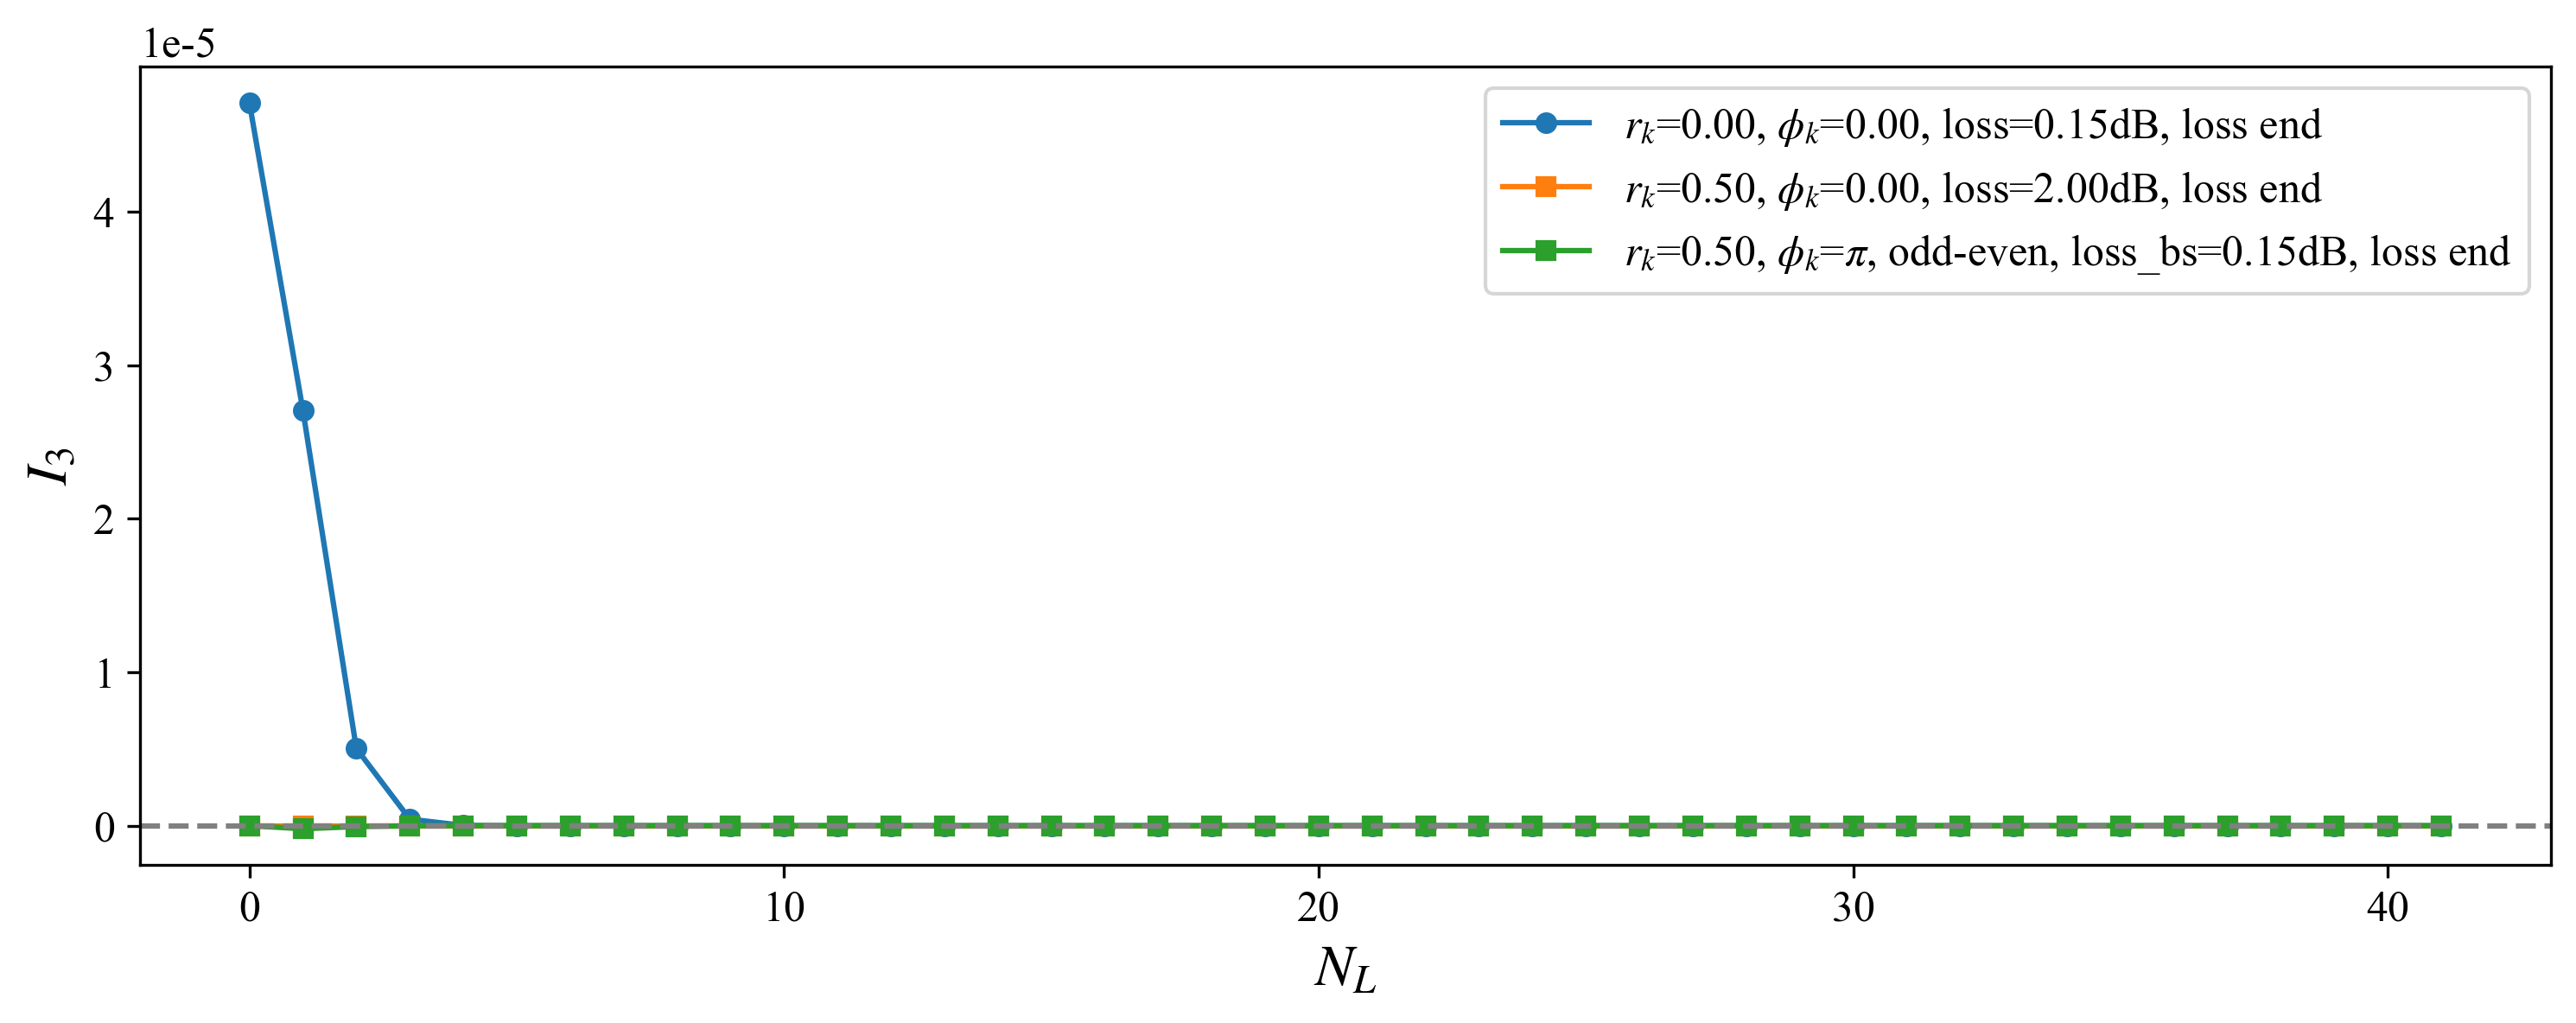

In [21]:
# scale
Ns: int = 1
Nm: int = 2
NL = np.arange(41, -1, -1)

# BS
eta = 9/20*np.pi

# S2
s_r: float = 0.6
s_phi: float = 0

# PS 
delta_k: float = 0

# S
r_k: float = 0.5
phi_k: float = 0

# loss
if_add_loss: bool = False
if_loss_input : bool = False
loss_amplitude_bs : float = None
loss_input : np.array = None

# additonal features
if_odd_even: bool = False
if_part_computing: bool = False
part_computing_layers: int = 0
if_uncertain_params: bool = False
uncertain_percentage: float = 0.05


I3 = np.zeros(len(NL))
I2_SM12 = np.zeros(len(NL))

plt.figure(figsize=(12, 4), dpi=300)


## loss end
################################
s_r = 0.5
r_k = 0
phi_k = 0
if_add_loss = True
loss_amplitude_bs = 0.15
if_loss_end = True

for j in tqdm(range(len(NL))):

    a = CV.TripartiteMutualInformation(
        Ns=Ns, Nm=Nm, NL=NL[j],  # scale
        eta=eta,              # BS
        s_r=s_r, s_phi=s_phi, # S2
        delta_k=delta_k,      # PS
        r_k=r_k, phi_k=phi_k, # S
        if_add_loss=if_add_loss, loss_amplitude_bs=loss_amplitude_bs,   # loss
        if_odd_even=if_odd_even,     # additonal features
        if_part_computing=if_part_computing,  # additonal features
        if_loss_end=if_loss_end,
    )
    a.compute()

    I3[j] = a.I3()
    I2_SM12[j] = a.I2_SM12()


plt.plot(NL, I3, 
            label=r'$r_k$={:.2f}, $\phi_k$={:.2f}, loss={:.2f}dB, loss end'.format(r_k, phi_k, loss_amplitude_bs),
            marker='o', markersize=5)

# ################################
s_r: float = 0.5
r_k = 0.5
phi_k = 0
if_add_loss = True
loss_amplitude_bs = 2

for j in tqdm(range(len(NL))):

    a = CV.TripartiteMutualInformation(
        Ns=Ns, Nm=Nm, NL=NL[j],  # scale
        eta=eta,              # BS
        s_r=s_r, s_phi=s_phi, # S2
        delta_k=delta_k,      # PS
        r_k=r_k, phi_k=phi_k, # S
        if_add_loss=if_add_loss, loss_amplitude_bs=loss_amplitude_bs,    # loss
        if_odd_even=if_odd_even,     # additonal features
        if_part_computing=if_part_computing,  # additonal features
        if_loss_end=if_loss_end,
    )
    a.compute()
    I3[j] = a.I3()
    I2_SM12[j] = a.I2_SM12()

plt.plot(NL, I3, 
            label=r'$r_k$={:.2f}, $\phi_k$={:.2f}, loss={:.2f}dB, loss end'.format(r_k, phi_k, loss_amplitude_bs),
            marker='s', markersize=5)

################################
s_r: float = 0.5
r_k = 0.5
phi_k = np.pi
if_odd_even = True
if_add_loss = True
loss_amplitude_bs = 0.15

for j in tqdm(range(len(NL))):

    a = CV.TripartiteMutualInformation(
        Ns=Ns, Nm=Nm, NL=NL[j],  # scale
        eta=eta,              # BS
        s_r=s_r, s_phi=s_phi, # S2
        delta_k=delta_k,      # PS
        r_k=r_k, phi_k=phi_k, # S
        if_add_loss=if_add_loss,  loss_amplitude_bs=loss_amplitude_bs,   # loss
        if_odd_even=if_odd_even,     # additonal features
        if_part_computing=if_part_computing,  # additonal features
        if_loss_end=if_loss_end,
    )
    a.compute()
    I3[j] = a.I3()
    I2_SM12[j] = a.I2_SM12()

plt.plot(NL, I3, 
            label=r'$r_k$={:.2f}, $\phi_k$=$\pi$, odd-even, loss_bs={:.2f}dB, loss end'.format(r_k, loss_amplitude_bs),
            marker='s', markersize=5)

################################
################################

# 加水平横线
plt.axhline(y=0, color='gray', linestyle='--')

plt.xlabel(r'$N_L$', fontsize=16)
plt.ylabel(r'$I_3$', fontsize=16)
plt.legend()
plt.savefig(r'pic1\2TMI-loss-end2.png', 
            dpi=300, bbox_inches='tight')

